In [1]:
# Prediction 1 (Primary Fuel): Classification Problem

# Import the necessary Liabrary from the system

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/refs/heads/main/global_Power_plant_database.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
# combine the common columns into one

df['total_generation'] = df['generation_gwh_2013'] + df['generation_gwh_2014'] + df['generation_gwh_2015']+ df['generation_gwh_2016'] + df['generation_gwh_2017'] 
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN,3643.093120
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN,22248.789736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# drop the combined columns

df.drop(['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'],axis = 1,inplace=True)


In [6]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_data_source,estimated_generation_gwh,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,Central Electricity Authority,NaN,3643.093120
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,Central Electricity Authority,NaN,22248.789736


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [8]:
# It will tell us how many Null values is there is Dataset.

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_data_source      458
estimated_generation_gwh    908
total_generation            530
dtype: int64

In [9]:
# After go through the data set we remove below columns as they will not impacting on our result.

df.drop(['country','country_long','name','gppd_idnr','url','geolocation_source'],axis = 1,inplace=True)

In [10]:
# We also remove below columns as they are contain maximum null value.

df.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis = 1,inplace=True)

In [11]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,year_of_capacity_data,generation_data_source,total_generation
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,2018.0,Central Electricity Authority,3643.093120
4,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,2018.0,Central Electricity Authority,22248.789736


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             908 non-null    float64
 1   latitude                862 non-null    float64
 2   longitude               862 non-null    float64
 3   primary_fuel            908 non-null    object 
 4   commissioning_year      528 non-null    float64
 5   owner                   342 non-null    object 
 6   source                  908 non-null    object 
 7   year_of_capacity_data   520 non-null    float64
 8   generation_data_source  450 non-null    object 
 9   total_generation        378 non-null    float64
dtypes: float64(6), object(4)
memory usage: 71.1+ KB


In [13]:
# It will show the frequency of unique elements.

for i in df:
    print(df[i].value_counts())

capacity_mw
5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
645.0      1
41.4       1
17.5       1
445.0      1
106.6      1
Name: count, Length: 365, dtype: int64
latitude
19.0004    3
24.1917    3
14.2352    2
16.5697    2
15.1839    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: count, Length: 837, dtype: int64
longitude
71.6917    4
71.6918    3
72.8983    3
81.2875    3
75.8988    3
          ..
72.7629    1
70.3961    1
74.2393    1
77.0435    1
77.4768    1
Name: count, Length: 828, dtype: int64
primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int64
commissioning_year
2013.0    28
2015.0    26
2012.0    23
2016.0    21
2010.0    17
          ..
1946.0     1
1956.0     1
1937.0     1
1959.0     1
1953.0     1
Name: count, Length: 73, dtype: int64
owner
Acc Acc ltd                                               

In [14]:
# It will show the list of unique element containing by each column

for i in df:
    print(df[i].unique())

[2.50000e+00 9.80000e+01 3.92000e+01 1.35000e+02 1.80000e+03 2.50000e+02
 6.00000e+01 1.92000e+02 2.90000e+02 2.10000e+02 1.35000e+03 1.34000e+02
 1.20000e+03 1.69500e+01 9.00000e+00 2.63000e+03 4.19330e+02 6.00000e+02
 1.00000e+01 1.70000e+01 2.40000e+01 6.52000e+02 4.60000e+01 5.00000e+01
 1.00000e+00 1.65000e+01 1.13600e+02 1.98000e+01 1.32000e+01 5.00000e+00
 2.00000e+02 7.05000e+02 2.80000e+01 4.50000e+02 1.80000e+02 1.05000e+03
 5.10000e+02 6.75000e+01 3.00000e+02 4.55000e+02 1.20000e+01 3.15000e+02
 3.00000e+01 2.00000e+01 4.20000e+01 7.20000e+02 9.00000e+01 1.32000e+03
 1.20000e+02 6.40000e+01 2.70000e+02 2.28000e+01 1.50000e+01 2.52000e+01
 1.80000e+01 1.70000e+03 4.10000e+01 1.32500e+03 3.40000e+01 1.60000e+01
 5.00000e+02 8.00000e+01 7.50000e+01 1.21000e+03 9.90000e+01 6.96000e+01
 6.00000e+00 4.00000e+01 1.65000e+02 7.50000e+02 7.00000e+01 8.15000e+01
 1.12000e+01 3.63000e+01 1.70000e+00 2.48000e+01 5.04000e+01 1.50000e+02
 9.87000e+01 3.00000e+00 4.20000e+00 5.40000e+02 2.

In [ ]:
# It will show total number of unique element each column containing.

df.nunique()

In [15]:
# replace and Fill the null values. 

df['year_of_capacity_data']=df['year_of_capacity_data'].replace(np.nan,2018)
df['generation_data_source']=df['generation_data_source'].replace(np.nan,'Central Electricity Authority')
df['owner']=df['owner'].fillna(df['owner'].mode()[0])
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,year_of_capacity_data,generation_data_source,total_generation
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,2018.0,Central Electricity Authority,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,2018.0,Central Electricity Authority,NaN
2,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,2018.0,Central Electricity Authority,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,2018.0,Central Electricity Authority,3643.093120
4,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,2018.0,Central Electricity Authority,22248.789736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,2018.0,Central Electricity Authority,NaN
904,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,2018.0,Central Electricity Authority,NaN
905,25.5,15.2758,75.5811,Wind,NaN,Acc Acc ltd,CDM,2018.0,Central Electricity Authority,NaN
906,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,2018.0,Central Electricity Authority,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             908 non-null    float64
 1   latitude                862 non-null    float64
 2   longitude               862 non-null    float64
 3   primary_fuel            908 non-null    object 
 4   commissioning_year      528 non-null    float64
 5   owner                   908 non-null    object 
 6   source                  908 non-null    object 
 7   year_of_capacity_data   908 non-null    float64
 8   generation_data_source  908 non-null    object 
 9   total_generation        378 non-null    float64
dtypes: float64(6), object(4)
memory usage: 71.1+ KB


In [17]:
# strategy='mean' replaces missing values using the mean of the column.
# strategy='median' replaces missing values using the median of the column.
# strategy='most_frequent' replaces missing values using the most frequent (or mode)

# Impute the null value using simple imputing (Median) for discreate data

from sklearn.impute import SimpleImputer
sim_imp=SimpleImputer(strategy='median')
fill_null=sim_imp.fit_transform(df[['year_of_capacity_data','commissioning_year']])
df1=pd.DataFrame(fill_null)
df1

,0,1
0,2018.0,2011.0
1,2018.0,2000.0
2,2018.0,2000.0
3,2018.0,2004.0
4,2018.0,2015.0
...,...,...
903,2018.0,2016.0
904,2018.0,2000.0
905,2018.0,2000.0
906,2018.0,2000.0


In [18]:
df[['year_of_capacity_data','commissioning_year']]=df1
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,year_of_capacity_data,generation_data_source,total_generation
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,2018.0,Central Electricity Authority,NaN
1,98.0,24.7663,74.6090,Coal,2000.0,Ultratech Cement ltd,Ultratech Cement ltd,2018.0,Central Electricity Authority,NaN
2,39.2,21.9038,69.3732,Wind,2000.0,AES,CDM,2018.0,Central Electricity Authority,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,2018.0,Central Electricity Authority,3643.093120
4,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,2018.0,Central Electricity Authority,22248.789736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,2018.0,Central Electricity Authority,NaN
904,3.0,12.8932,78.1654,Solar,2000.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,2018.0,Central Electricity Authority,NaN
905,25.5,15.2758,75.5811,Wind,2000.0,Acc Acc ltd,CDM,2018.0,Central Electricity Authority,NaN
906,80.0,24.3500,73.7477,Coal,2000.0,Hindustan Zinc ltd,Hindustan Zinc ltd,2018.0,Central Electricity Authority,NaN


In [19]:
# Impute the null value using simple imputing (Mean) for continous data

from sklearn.impute import SimpleImputer
sim_imp=SimpleImputer(strategy='mean')
fill_null=sim_imp.fit_transform(df[['latitude','longitude','total_generation']])
df1=pd.DataFrame(fill_null)
df1

,0,1,2
0,28.1839,73.2407,12569.845799
1,24.7663,74.6090,12569.845799
2,21.9038,69.3732,12569.845799
3,23.8712,91.3602,3643.093120
4,21.9603,82.4091,22248.789736
...,...,...,...
903,16.2949,77.3568,12569.845799
904,12.8932,78.1654,12569.845799
905,15.2758,75.5811,12569.845799
906,24.3500,73.7477,12569.845799


In [20]:
df[['latitude','longitude','total_generation']]=df1
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,year_of_capacity_data,generation_data_source,total_generation
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,2018.0,Central Electricity Authority,12569.845799
1,98.0,24.7663,74.6090,Coal,2000.0,Ultratech Cement ltd,Ultratech Cement ltd,2018.0,Central Electricity Authority,12569.845799
2,39.2,21.9038,69.3732,Wind,2000.0,AES,CDM,2018.0,Central Electricity Authority,12569.845799
3,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,2018.0,Central Electricity Authority,3643.093120
4,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,2018.0,Central Electricity Authority,22248.789736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,2018.0,Central Electricity Authority,12569.845799
904,3.0,12.8932,78.1654,Solar,2000.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,2018.0,Central Electricity Authority,12569.845799
905,25.5,15.2758,75.5811,Wind,2000.0,Acc Acc ltd,CDM,2018.0,Central Electricity Authority,12569.845799
906,80.0,24.3500,73.7477,Coal,2000.0,Hindustan Zinc ltd,Hindustan Zinc ltd,2018.0,Central Electricity Authority,12569.845799


In [21]:
# Now no null value is there in dataset and each column contain the correct datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             908 non-null    float64
 1   latitude                908 non-null    float64
 2   longitude               908 non-null    float64
 3   primary_fuel            908 non-null    object 
 4   commissioning_year      908 non-null    float64
 5   owner                   908 non-null    object 
 6   source                  908 non-null    object 
 7   year_of_capacity_data   908 non-null    float64
 8   generation_data_source  908 non-null    object 
 9   total_generation        908 non-null    float64
dtypes: float64(6), object(4)
memory usage: 71.1+ KB


In [22]:
# It will check the duplicate elements in the Dataset.

df.duplicated().sum()

0

In [23]:
# It will tell the short story about the dataset.

df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,total_generation
count,908.000000,908.000000,908.000000,908.000000,908.0,908.000000
mean,321.046378,21.196189,77.447848,1998.183921,2018.0,12569.845799
std,580.221767,6.088110,4.781201,13.085938,0.0,13236.283375
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000
25%,16.837500,17.057825,74.390250,1997.000000,2018.0,7403.735300
50%,60.000000,21.278850,76.978950,2000.000000,2018.0,12569.845799
75%,388.125000,25.183775,79.211600,2003.000000,2018.0,12569.845799
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,148533.390000


In [24]:
# Split Numerical data and Categorical Data

# It will tell these are the categorical column in dataset

categorical_object=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_object.append(i)      
print("Categorical Data",categorical_object)    

Categorical Data ['primary_fuel', 'owner', 'source', 'generation_data_source']


In [25]:
# It will tell these are the numerical column in dataset

numerical_object=[]
for i in df.dtypes.index:
    if (df.dtypes[i]!='object'):
        numerical_object.append(i) 
print("Numerical Data\n",numerical_object)          

Numerical Data
 ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'total_generation']


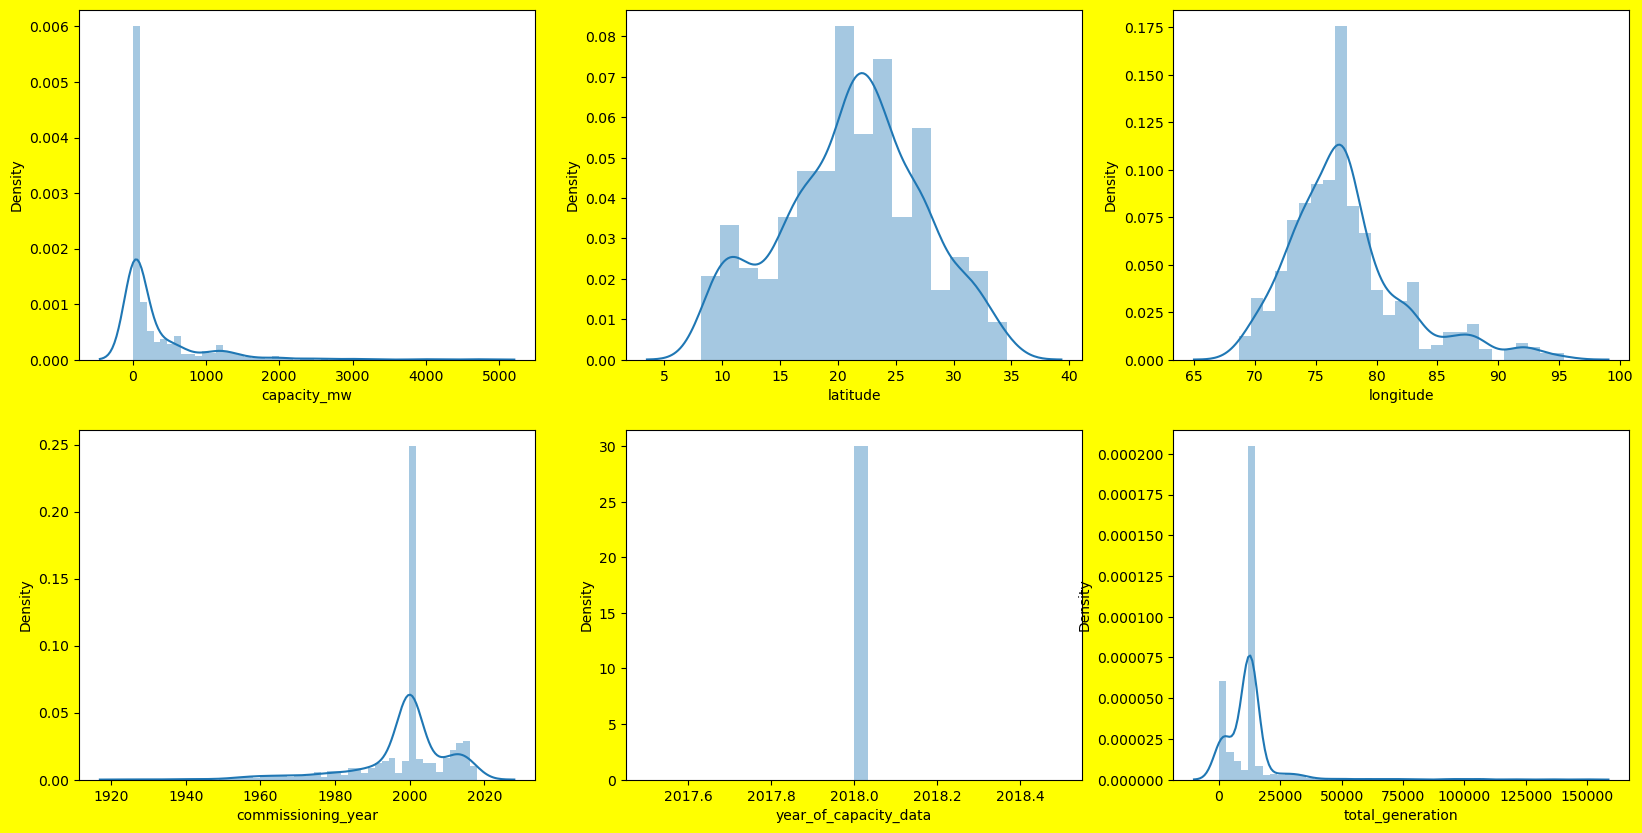

In [26]:
# Here we check how data is distributed, it is normally distributed or not.

# After go through the dataset we assume something that skewness and outliers is there so now we analyse the data to check 
# howmuch our assumption is correct.

plt.figure(figsize=(20,10),facecolor='yellow')
number=1
for i in numerical_object:
    if number<=6:
        ax=plt.subplot(2,3,number)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    number+=1
plt.show()                                                                                       

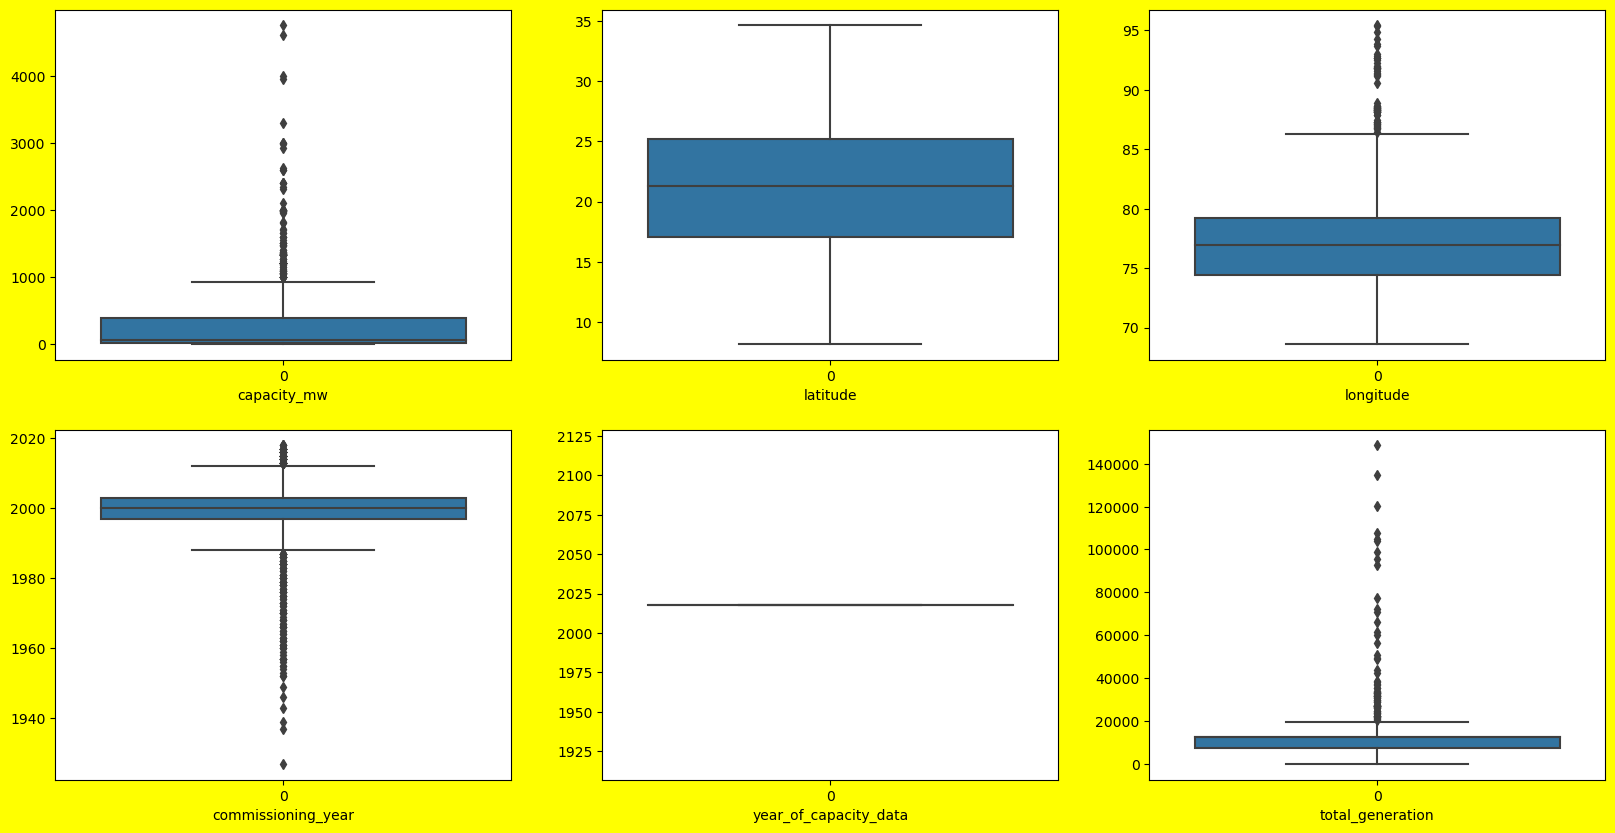

In [27]:
plt.figure(figsize=(20,10),facecolor='yellow')
number=1
for i in numerical_object:
    if number<=6:
        ax=plt.subplot(2,3,number)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=10)
    number+=1
plt.show()

In [28]:
# Find the standard number of outlier and remove it

from scipy.stats import zscore

z_score=zscore(df[['capacity_mw','longitude','commissioning_year','total_generation']])
data=np.abs(z_score)
filter_data=(data<3).all(axis=1)
df=df[filter_data]
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,year_of_capacity_data,generation_data_source,total_generation
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,2018.0,Central Electricity Authority,12569.845799
1,98.0,24.7663,74.6090,Coal,2000.0,Ultratech Cement ltd,Ultratech Cement ltd,2018.0,Central Electricity Authority,12569.845799
2,39.2,21.9038,69.3732,Wind,2000.0,AES,CDM,2018.0,Central Electricity Authority,12569.845799
3,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,2018.0,Central Electricity Authority,3643.093120
4,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,2018.0,Central Electricity Authority,22248.789736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,2018.0,Central Electricity Authority,12569.845799
904,3.0,12.8932,78.1654,Solar,2000.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,2018.0,Central Electricity Authority,12569.845799
905,25.5,15.2758,75.5811,Wind,2000.0,Acc Acc ltd,CDM,2018.0,Central Electricity Authority,12569.845799
906,80.0,24.3500,73.7477,Coal,2000.0,Hindustan Zinc ltd,Hindustan Zinc ltd,2018.0,Central Electricity Authority,12569.845799


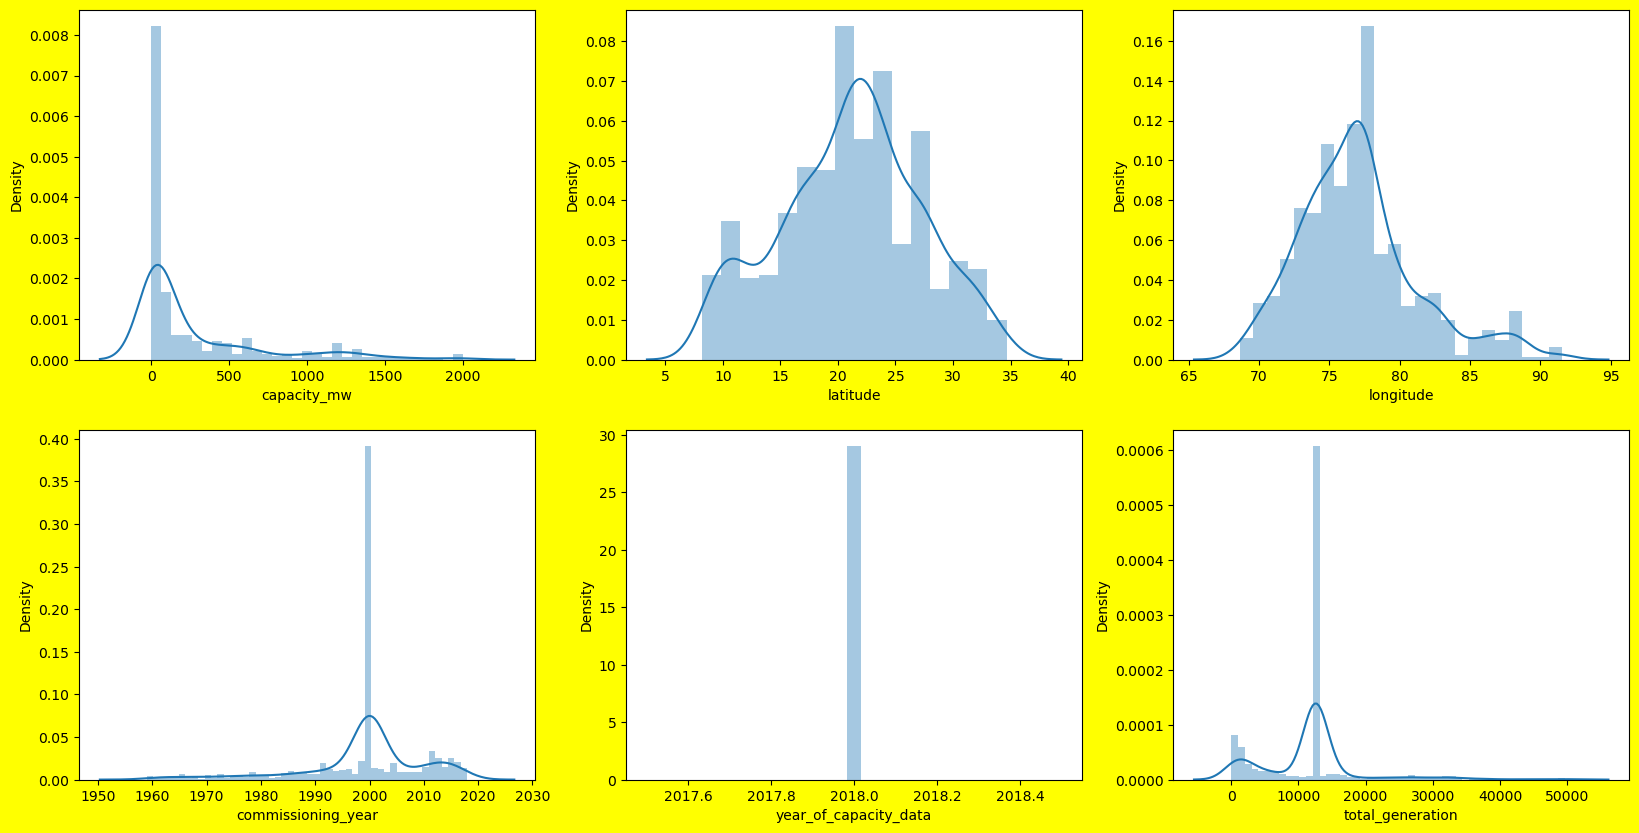

In [29]:
plt.figure(figsize=(20,10),facecolor='yellow')
number=1
for i in numerical_object:
    if number<=6:
        ax=plt.subplot(2,3,number)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    number+=1
plt.show()                                                                                       

In [30]:
# To save list into dataframe

for i in categorical_object:
    print(df[i].value_counts())

#cate_dataframe=pd.DataFrame(categorical_object)
#categorical_object.value_counts()

primary_fuel
Coal       239
Hydro      218
Solar      126
Wind       123
Gas         65
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int64
owner
Acc Acc ltd                                                    514
Sterling Agro Industries ltd.                                    4
Jk Cement ltd                                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
Karnataka Power Corporation Limited                              3
                                                              ... 
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Energy Infratech Private Limited                                 1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: count, Length: 279, dtype: int64
source
Central Electricity Authority                       

In [31]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder

lab_end=LabelEncoder()
encod=lab_end.fit_transform(df['generation_data_source'])
df['generation_data_source']=encod

In [32]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,year_of_capacity_data,generation_data_source,total_generation
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,2018.0,0,12569.845799
1,98.0,24.7663,74.6090,Coal,2000.0,Ultratech Cement ltd,Ultratech Cement ltd,2018.0,0,12569.845799
2,39.2,21.9038,69.3732,Wind,2000.0,AES,CDM,2018.0,0,12569.845799
3,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,2018.0,0,3643.093120
4,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,2018.0,0,22248.789736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,2018.0,0,12569.845799
904,3.0,12.8932,78.1654,Solar,2000.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,2018.0,0,12569.845799
905,25.5,15.2758,75.5811,Wind,2000.0,Acc Acc ltd,CDM,2018.0,0,12569.845799
906,80.0,24.3500,73.7477,Coal,2000.0,Hindustan Zinc ltd,Hindustan Zinc ltd,2018.0,0,12569.845799


In [33]:
from category_encoders import BinaryEncoder

bi_enc=BinaryEncoder()

encod1=bi_enc.fit_transform(df[['owner','source']])
encod1

,owner_0,owner_1,owner_2,owner_3,owner_4,owner_5,owner_6,owner_7,owner_8,source_0,source_1,source_2,source_3,source_4,source_5,source_6,source_7
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
904,0,0,1,1,0,1,0,1,1,0,1,0,0,1,1,1,1
905,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
906,0,0,0,1,1,0,1,1,0,0,0,1,0,1,0,1,0


In [34]:
df=pd.concat([df,encod1],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 0 to 907
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             851 non-null    float64
 1   latitude                851 non-null    float64
 2   longitude               851 non-null    float64
 3   primary_fuel            851 non-null    object 
 4   commissioning_year      851 non-null    float64
 5   owner                   851 non-null    object 
 6   source                  851 non-null    object 
 7   year_of_capacity_data   851 non-null    float64
 8   generation_data_source  851 non-null    int32  
 9   total_generation        851 non-null    float64
 10  owner_0                 851 non-null    int64  
 11  owner_1                 851 non-null    int64  
 12  owner_2                 851 non-null    int64  
 13  owner_3                 851 non-null    int64  
 14  owner_4                 851 non-null    int64  

In [35]:
df.drop(['owner','source'],axis=1,inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             851 non-null    float64
 1   latitude                851 non-null    float64
 2   longitude               851 non-null    float64
 3   primary_fuel            851 non-null    object 
 4   commissioning_year      851 non-null    float64
 5   year_of_capacity_data   851 non-null    float64
 6   generation_data_source  851 non-null    int32  
 7   total_generation        851 non-null    float64
 8   owner_0                 851 non-null    int64  
 9   owner_1                 851 non-null    int64  
 10  owner_2                 851 non-null    int64  
 11  owner_3                 851 non-null    int64  
 12  owner_4                 851 non-null    int64  
 13  owner_5                 851 non-null    int64  
 14  owner_6                 851 non-null    int64  

In [37]:
# Encoding Target variable categorical multilevel data

lab_end=LabelEncoder()
encod2=lab_end.fit_transform(df['primary_fuel'])
df['primary_fuel']=encod2

In [38]:
# Check data balanced or not

df['primary_fuel'].value_counts()

primary_fuel
1    239
3    218
6    126
7    123
2     65
0     50
5     21
4      9
Name: count, dtype: int64

In [39]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_data_source,total_generation,owner_0,owner_1,...,owner_7,owner_8,source_0,source_1,source_2,source_3,source_4,source_5,source_6,source_7
0,2.5,28.1839,73.2407,6,2011.0,2018.0,0,12569.845799,0,0,...,0,1,0,0,0,0,0,0,0,1
1,98.0,24.7663,74.6090,1,2000.0,2018.0,0,12569.845799,0,0,...,1,0,0,0,0,0,0,0,1,0
2,39.2,21.9038,69.3732,7,2000.0,2018.0,0,12569.845799,0,0,...,1,1,0,0,0,0,0,0,1,1
3,135.0,23.8712,91.3602,2,2004.0,2018.0,0,3643.093120,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1800.0,21.9603,82.4091,1,2015.0,2018.0,0,22248.789736,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,2018.0,0,12569.845799,0,0,...,0,0,0,0,0,0,0,1,0,0
904,3.0,12.8932,78.1654,6,2000.0,2018.0,0,12569.845799,0,0,...,1,1,0,1,0,0,1,1,1,1
905,25.5,15.2758,75.5811,7,2000.0,2018.0,0,12569.845799,0,0,...,0,0,0,0,0,0,0,0,1,1
906,80.0,24.3500,73.7477,1,2000.0,2018.0,0,12569.845799,0,0,...,1,0,0,0,1,0,1,0,1,0


In [40]:
df.drop(['year_of_capacity_data','generation_data_source'],axis=1,inplace=True)

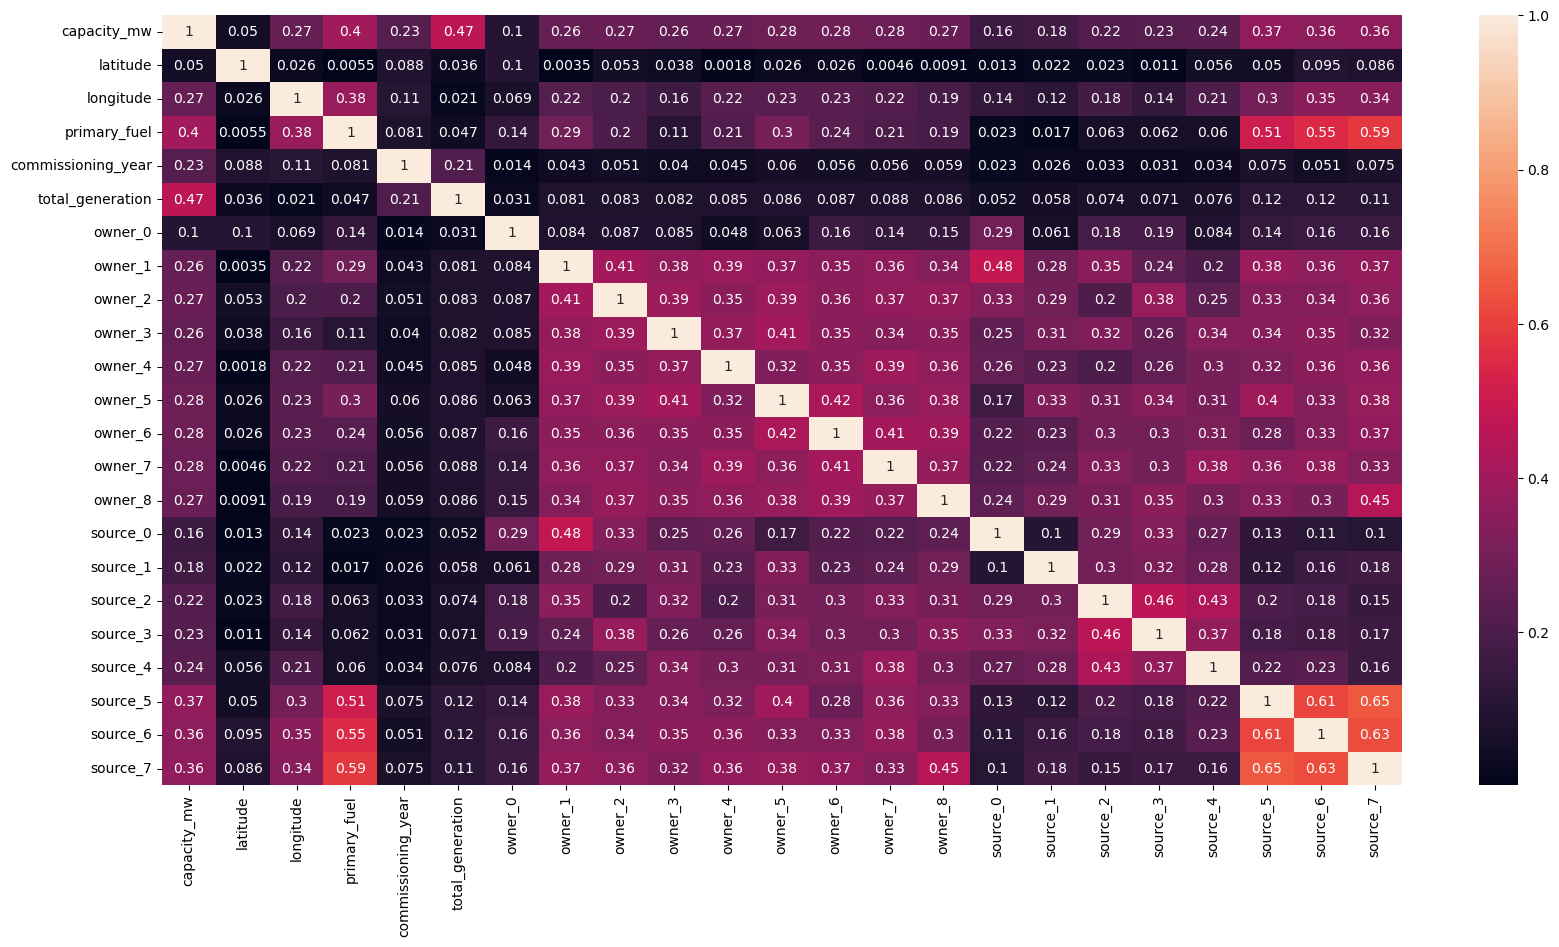

In [41]:
# Check the corelation and relationship b/w data (feature and Target)

plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True)
plt.show()

# After go through the heapmap we can see there is no corelation 

In [42]:
x=df.drop(['primary_fuel'],axis=1)
y=df.primary_fuel

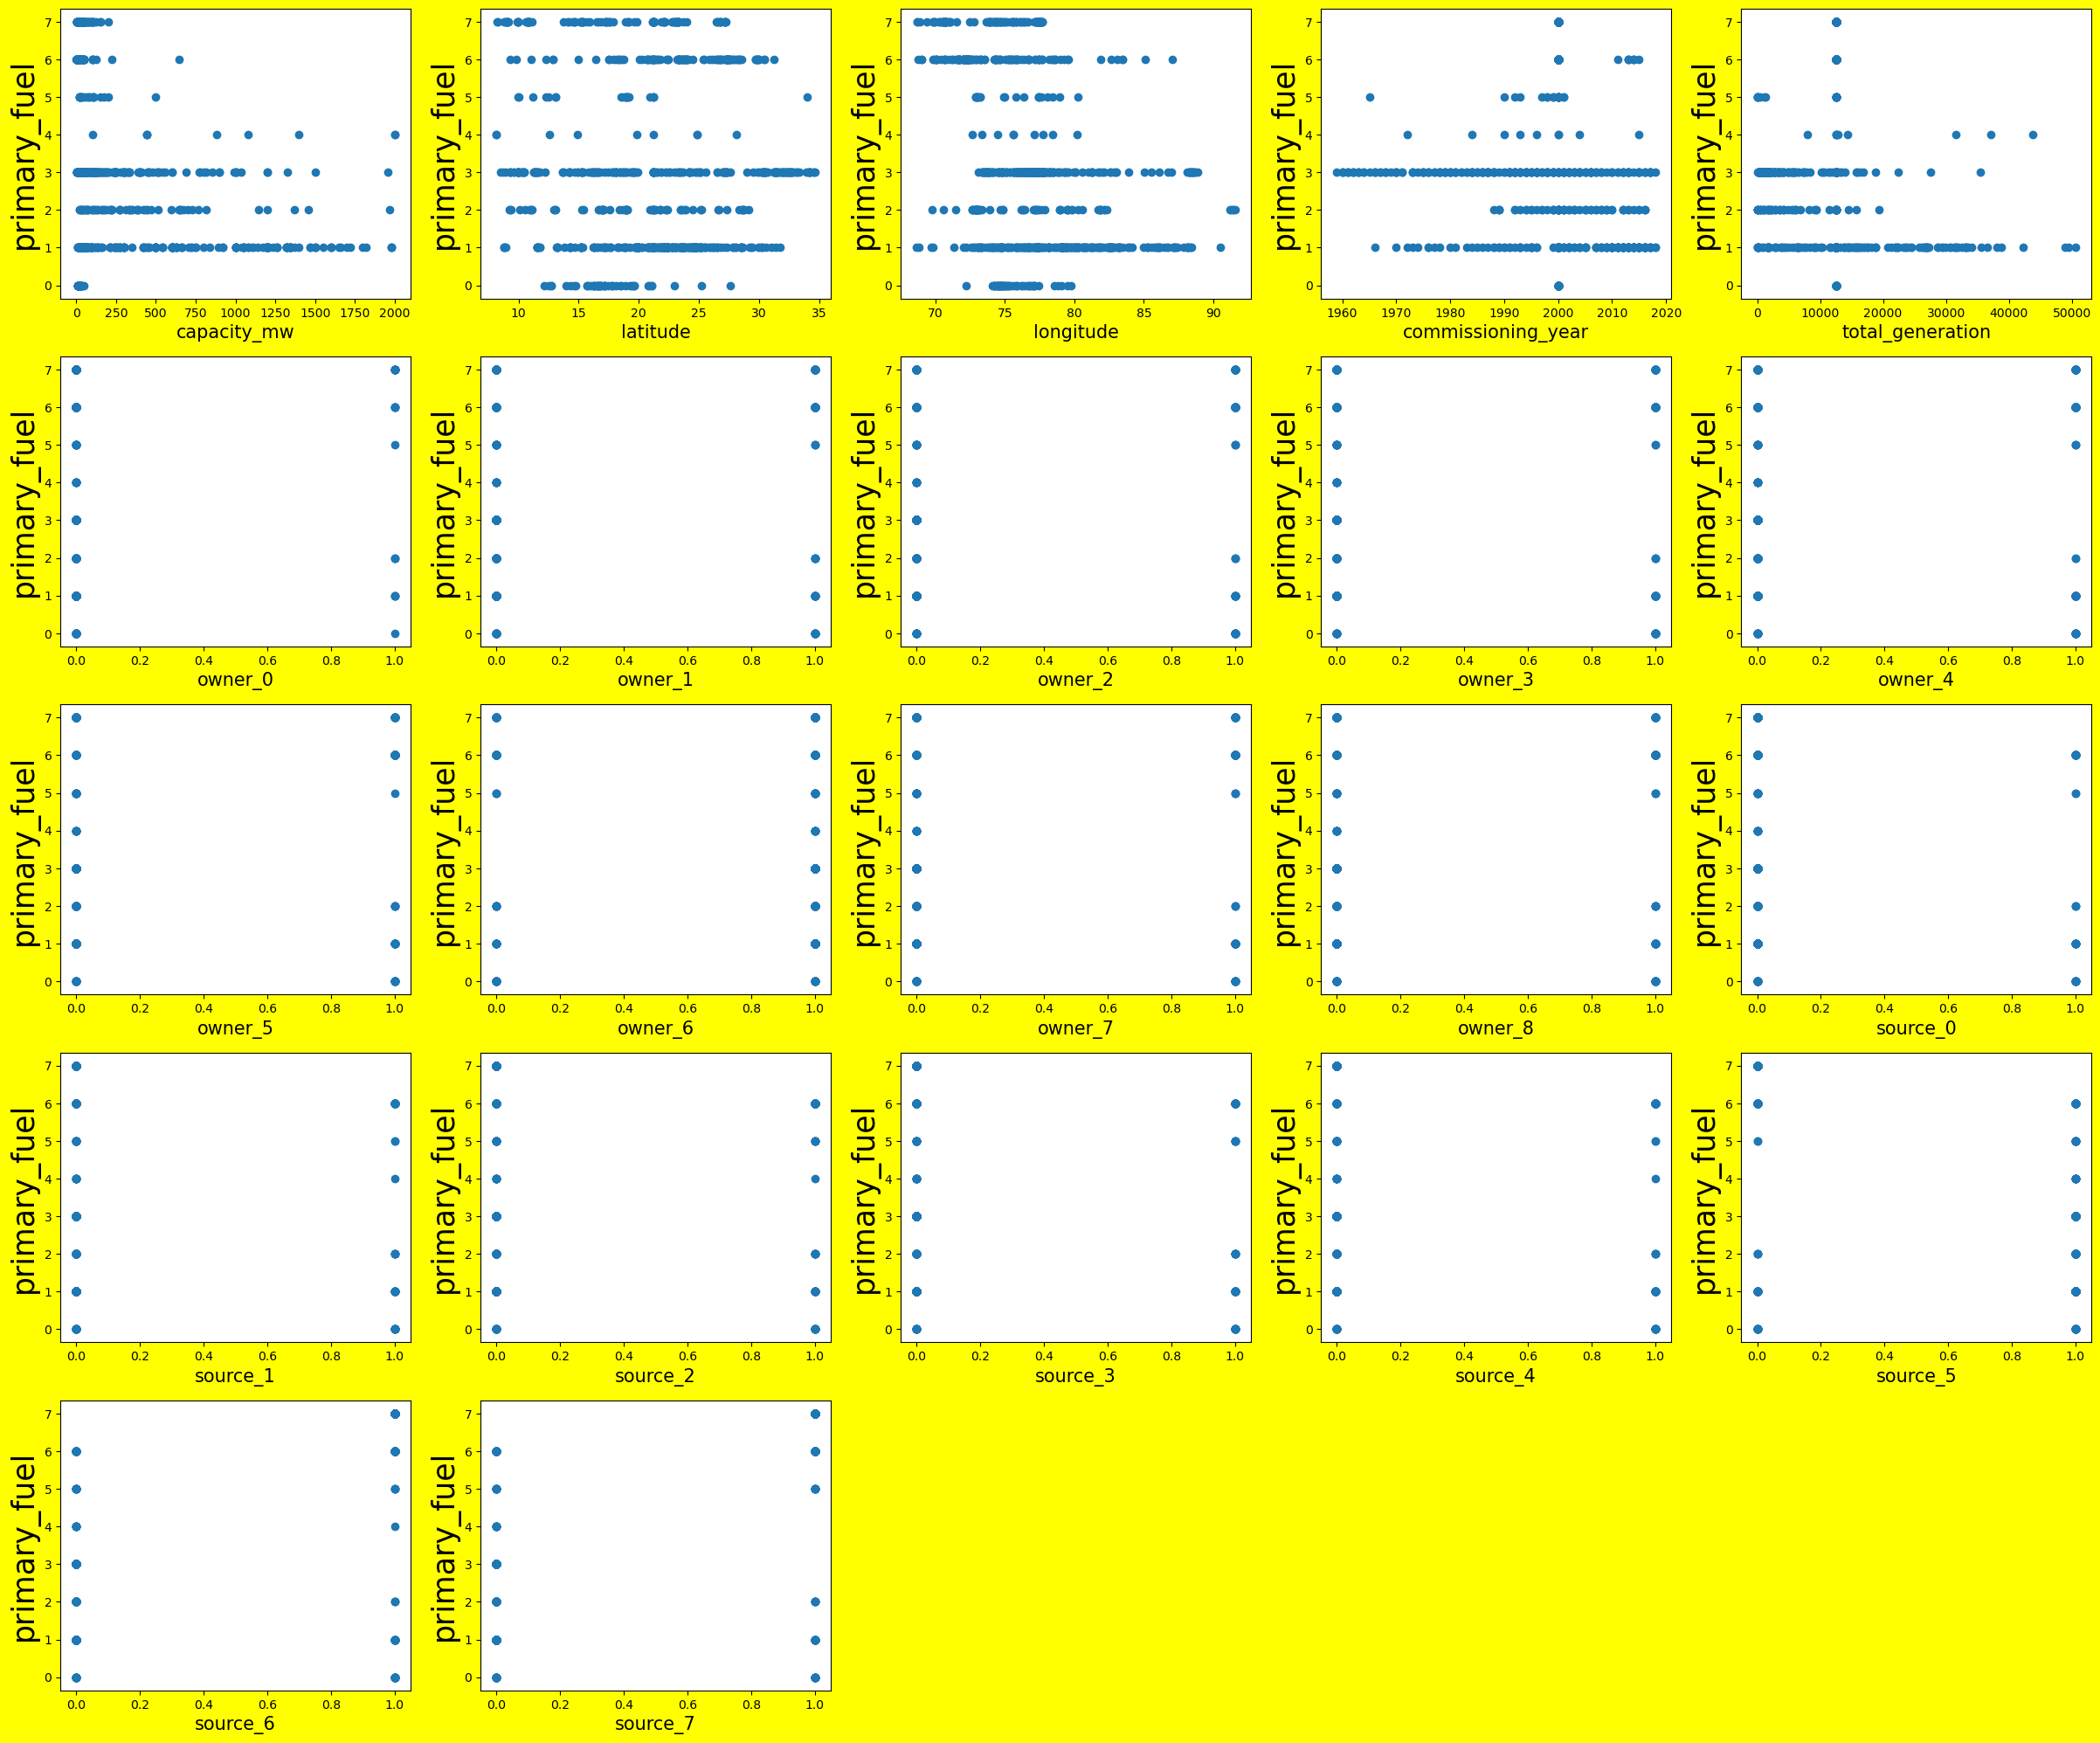

In [43]:
# Now we check the relation b/w Input and Output Variable

plt.figure(figsize=(30,25),facecolor='yellow')
number=1
for i in x:
    if number<=23:
        ax=plt.subplot(5,5,number)
        plt.scatter(x[i],y)
        plt.xlabel(i,fontsize=15)
        plt.ylabel('primary_fuel',fontsize=25)
    number+=1
plt.show()

# After go through the graph we analyse every feature has a relation with target so we can not remove any feature data on the 
# basis of assumption untill we are not sure.

In [44]:
# Now standarised the data means take all data on one scale.

from sklearn.preprocessing import StandardScaler

x_scaler=StandardScaler()
x_scaler=x_scaler.fit_transform(x)
x_scaler

array([[-0.6324824 ,  1.15619276, -0.89349369, ..., -1.49936373,
        -0.66327394,  1.51606385],
       [-0.4073369 ,  0.59760266, -0.56826977, ..., -1.49936373,
         1.50767268, -0.65960282],
       [-0.54596052,  0.12974096, -1.81273914, ..., -1.49936373,
         1.50767268,  1.51606385],
       ...,
       [-0.57825888, -0.9535734 , -0.3372165 , ..., -1.49936373,
         1.50767268,  1.51606385],
       [-0.4497727 ,  0.52956045, -0.77298757, ..., -1.49936373,
         1.50767268, -0.65960282],
       [-0.59947678, -1.82659925,  0.11336232, ..., -1.49936373,
         1.50767268,  1.51606385]])

In [ ]:
# Here we use PCA Technique which convert feature into dimentions and select required dimentions and remaining will be removed.

In [45]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_scaler)

array([[ 0.81242833, -1.04616979,  1.15114864, ..., -0.37393183,
         0.11573284, -0.49810293],
       [ 0.66809634, -1.20025796,  0.71623692, ..., -1.09644055,
         1.08355553, -0.89495878],
       [ 2.14353678, -2.20867073,  1.20108162, ..., -0.38676413,
         0.36777051, -1.0065979 ],
       ...,
       [-0.00726832, -2.49120481,  1.16051478, ..., -0.06348627,
        -0.28710127, -0.67409528],
       [ 2.52989154,  0.27960096, -0.14297623, ..., -0.44718554,
         0.76329577, -0.06810241],
       [ 2.24307485, -2.35889989,  0.73229548, ..., -0.16670184,
         0.44136079,  1.14141768]])

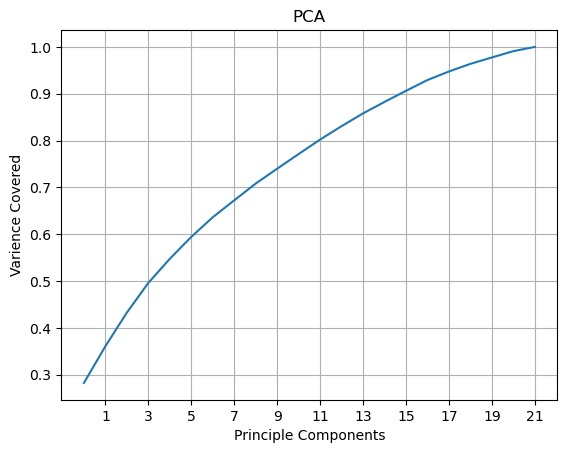

In [46]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,23,2))
plt.xlabel('Principle Components')
plt.ylabel('Varience Covered')
plt.title('PCA')
plt.show()

In [47]:
pca=PCA(n_components=19) # here we select required dimensions number
new_comp=pca.fit_transform(x_scaler)
princi_comp=pd.DataFrame(new_comp)
princi_comp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.812428,-1.046170,1.151149,0.339066,-0.649384,-1.386840,-1.273083,0.382968,1.400182,0.095099,0.870812,-0.238625,1.287771,-1.776645,0.719824,-0.795018,-0.151598,0.132338,1.583959
1,0.668096,-1.200258,0.716237,0.400990,-0.593063,-1.054577,-0.086003,-1.256266,0.110121,-0.033173,0.895120,-0.365437,-1.978287,-0.598948,1.061843,0.076630,0.478219,0.691001,0.175518
2,2.143537,-2.208671,1.201082,0.724879,-1.030522,-0.955810,0.036373,-0.712246,1.145140,0.257048,0.775915,0.126985,-0.299552,-2.384457,0.477043,-0.000296,0.592912,0.878900,0.186711
3,-2.476051,0.458474,-0.672166,-0.403007,0.300337,0.740500,-2.543316,-0.247165,-0.359757,-1.200668,-0.780680,-0.259474,-0.557260,0.142876,0.366183,-0.411586,-0.433766,-0.158510,-0.228983
4,-2.763675,2.358104,2.807841,0.405575,0.067670,0.488106,0.043469,-0.092154,0.025809,-0.149492,0.009327,-0.010564,-0.037629,0.011365,-0.105846,0.013457,-0.000550,0.045139,-0.236687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,-2.509138,1.359627,1.833324,0.394782,0.037518,0.737045,0.126112,-0.103734,-0.293183,0.845976,0.758453,0.318344,0.369500,-0.065248,-0.460667,0.200413,0.226610,0.177334,-0.206081
847,4.377519,0.223729,0.313609,-2.079380,-1.884743,2.166004,-0.353645,-1.322004,0.857654,0.292109,0.419986,-1.253794,0.043577,-1.097699,0.080735,2.062293,-1.818197,-0.043810,-1.063827
848,-0.007268,-2.491205,1.160515,0.600119,-0.410951,0.243970,0.228975,0.626435,-1.070609,0.186575,-0.402066,0.001993,-0.033320,-0.088938,0.344353,-0.422240,-0.269437,0.192817,0.084826
849,2.529892,0.279601,-0.142976,-0.130635,-0.773353,-1.396214,0.963510,-2.734245,-2.890531,-0.480604,-1.050331,0.266147,0.157716,0.302381,0.059178,0.220433,1.365679,-0.898995,-0.066455


In [48]:
# Split the dataset into Training and Test Data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=.25,random_state=42)

In [49]:
# Knn Model to Solve Classification Problem

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_score, recall_score,f1_score

In [51]:
train_pred=knn.predict(x_train)
train_pred

array([6, 7, 1, 1, 3, 3, 1, 1, 0, 7, 7, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 7,
       7, 2, 2, 1, 2, 6, 1, 7, 1, 3, 3, 1, 3, 1, 6, 3, 3, 3, 0, 7, 3, 6,
       7, 1, 7, 1, 2, 3, 3, 3, 0, 3, 1, 3, 3, 7, 3, 2, 3, 6, 7, 0, 1, 3,
       2, 3, 7, 1, 1, 2, 3, 6, 1, 7, 7, 3, 1, 7, 1, 1, 0, 6, 1, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 3, 1, 6, 1, 1, 1, 1, 6, 1, 3, 3, 1, 3, 3, 7, 5,
       0, 3, 1, 0, 7, 3, 1, 7, 6, 6, 3, 3, 1, 3, 7, 7, 1, 6, 7, 6, 3, 7,
       3, 1, 1, 1, 3, 1, 3, 6, 0, 7, 7, 3, 1, 3, 3, 7, 2, 0, 2, 2, 2, 6,
       7, 3, 1, 7, 3, 1, 3, 3, 1, 7, 1, 3, 1, 2, 3, 1, 6, 1, 1, 1, 0, 7,
       6, 1, 6, 1, 3, 1, 6, 1, 0, 6, 1, 3, 2, 6, 7, 1, 6, 1, 3, 3, 6, 1,
       7, 6, 7, 3, 3, 6, 7, 7, 0, 2, 7, 3, 7, 3, 3, 7, 3, 3, 2, 3, 1, 1,
       3, 3, 6, 1, 7, 6, 7, 1, 3, 1, 3, 1, 1, 3, 6, 1, 2, 1, 6, 7, 6, 1,
       1, 7, 3, 3, 3, 1, 2, 7, 3, 5, 2, 2, 1, 1, 3, 7, 0, 1, 1, 6, 1, 1,
       1, 7, 7, 3, 1, 1, 1, 1, 1, 1, 6, 1, 6, 3, 0, 3, 1, 3, 7, 1, 1, 6,
       3, 3, 1, 6, 6, 3, 1, 2, 0, 6, 3, 6, 6, 6, 1,

In [52]:
train_accu_score=accuracy_score(y_train,train_pred)
train_accu_score

0.8213166144200627

In [53]:
test_pred=knn.predict(x_test)
test_pred

array([3, 3, 1, 1, 1, 6, 2, 2, 1, 1, 6, 3, 3, 6, 3, 6, 3, 1, 6, 3, 7, 3,
       0, 1, 7, 3, 3, 7, 6, 0, 1, 3, 3, 6, 3, 0, 3, 2, 3, 1, 7, 7, 1, 7,
       6, 1, 1, 3, 0, 1, 2, 3, 3, 7, 0, 6, 7, 6, 7, 3, 1, 3, 3, 1, 3, 3,
       1, 3, 2, 1, 3, 6, 7, 1, 1, 3, 1, 6, 2, 3, 6, 1, 3, 3, 7, 3, 0, 0,
       6, 2, 1, 6, 6, 1, 1, 1, 1, 7, 3, 6, 6, 3, 6, 3, 3, 1, 2, 1, 3, 1,
       1, 1, 5, 0, 1, 1, 1, 6, 1, 1, 7, 3, 1, 0, 6, 0, 6, 2, 3, 7, 7, 1,
       6, 3, 2, 1, 7, 0, 1, 1, 3, 6, 1, 6, 1, 1, 7, 1, 7, 3, 3, 3, 0, 1,
       3, 1, 0, 3, 7, 1, 0, 1, 0, 3, 2, 6, 3, 3, 0, 1, 7, 1, 1, 3, 1, 6,
       6, 6, 0, 7, 2, 5, 1, 3, 0, 1, 1, 6, 7, 1, 1, 3, 6, 3, 0, 7, 3, 3,
       1, 1, 3, 1, 1, 7, 1, 1, 1, 1, 3, 3, 3, 7, 1])

In [54]:
conf_mat=confusion_matrix(y_test,test_pred)
conf_mat

array([[10,  1,  0,  0,  0,  0,  1,  0],
       [ 4, 50,  3,  3,  0,  1,  2,  1],
       [ 0,  1,  7,  3,  0,  0,  3,  0],
       [ 0,  8,  1, 48,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  3,  0,  0,  2,  0],
       [ 4,  5,  1,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  1, 24]], dtype=int64)

In [55]:
test_accu_score1=accuracy_score(y_test,test_pred)
test_accu_score1

0.755868544600939

In [56]:
test_accu_scoree1=recall_score(y_test,test_pred,average='macro')
test_accu_scoree1

0.5737086925287356

In [57]:
test_accu_scoreee1=precision_score(y_test,test_pred,average='macro')
test_accu_scoreee1

0.5459625577545212

In [58]:
test_accu_scorre1=f1_score(y_test,test_pred,average='macro')
test_accu_scorre1

0.555022114314803

In [59]:
from sklearn.metrics import classification_report

In [60]:
class_rep=classification_report(y_test,test_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.53      0.83      0.65        12
           1       0.75      0.78      0.76        64
           2       0.58      0.50      0.54        14
           3       0.84      0.83      0.83        58
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.71      0.69      0.70        32
           7       0.96      0.96      0.96        25

    accuracy                           0.76       213
   macro avg       0.55      0.57      0.56       213
weighted avg       0.74      0.76      0.75       213



In [ ]:
# We can see that Knn Model is performing good 
# But we will try other model also ,may be that model can performn more better.

In [ ]:
# Logistic Regression Model

In [61]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression()

In [62]:
test_pred1=lm.predict(x_test)
test_pred1

array([3, 3, 1, 1, 1, 6, 1, 3, 1, 1, 6, 3, 3, 2, 3, 6, 3, 3, 6, 3, 7, 3,
       1, 3, 7, 3, 3, 7, 6, 0, 1, 3, 3, 6, 3, 0, 3, 1, 3, 3, 7, 7, 1, 7,
       6, 1, 1, 3, 0, 1, 6, 3, 3, 7, 1, 6, 1, 6, 7, 3, 1, 3, 3, 1, 3, 2,
       1, 3, 3, 1, 3, 1, 7, 1, 1, 3, 3, 6, 2, 3, 6, 1, 3, 3, 7, 3, 6, 1,
       6, 2, 1, 6, 6, 0, 1, 1, 1, 7, 3, 6, 6, 3, 0, 3, 3, 1, 3, 3, 3, 1,
       3, 1, 3, 6, 1, 1, 1, 6, 1, 1, 7, 3, 1, 0, 6, 6, 6, 3, 3, 7, 7, 3,
       1, 3, 3, 1, 7, 6, 3, 1, 3, 1, 1, 6, 6, 3, 7, 1, 7, 3, 3, 3, 0, 1,
       3, 3, 6, 1, 7, 3, 6, 1, 1, 3, 3, 6, 3, 3, 1, 1, 7, 1, 1, 3, 1, 6,
       7, 6, 1, 7, 3, 3, 1, 3, 6, 1, 3, 6, 7, 6, 1, 3, 0, 3, 0, 7, 3, 3,
       1, 1, 3, 3, 1, 7, 6, 3, 6, 1, 3, 3, 3, 7, 0])

In [63]:
conf_mat=confusion_matrix(y_test,test_pred1)
conf_mat

array([[ 6,  2,  0,  0,  0,  0,  4,  0],
       [ 3, 42,  0, 17,  0,  0,  2,  0],
       [ 0,  2,  2,  7,  0,  0,  3,  0],
       [ 0,  6,  1, 51,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  3,  0,  0,  1,  0],
       [ 0,  5,  1,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25]], dtype=int64)

In [64]:
test_accu_score2=accuracy_score(y_test,test_pred1)
test_accu_score2

0.7136150234741784

In [65]:
test_accu_scoree2=recall_score(y_test,test_pred1,average='macro')
test_accu_scoree2

0.49886468596059114

In [66]:
test_accu_scoreee2=precision_score(y_test,test_pred1,average='macro')
test_accu_scoreee2

0.5220085470085469

In [67]:
test_accu_scorre2=f1_score(y_test,test_pred1,average='macro')
test_accu_scorre2

0.4949752506085523

In [ ]:
# We can see that Logistic Regression Model is not performing batter than Knn Model. 
# So we will try other model also ,may be that model can performn more better.

In [68]:
# Decision Tree model

from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
test_pred2=dec_tree.predict(x_test)
test_pred2

array([3, 3, 1, 1, 1, 6, 0, 2, 1, 4, 6, 2, 3, 0, 3, 1, 3, 3, 6, 3, 7, 0,
       0, 1, 7, 3, 3, 7, 6, 5, 6, 1, 6, 6, 1, 1, 3, 2, 1, 1, 7, 7, 1, 7,
       6, 1, 1, 5, 0, 1, 6, 3, 3, 7, 2, 6, 0, 6, 7, 3, 1, 3, 5, 1, 3, 3,
       2, 1, 2, 4, 3, 1, 7, 0, 1, 2, 1, 6, 3, 3, 2, 3, 3, 2, 7, 3, 1, 1,
       6, 2, 1, 6, 6, 6, 1, 1, 1, 7, 3, 6, 6, 2, 1, 1, 3, 3, 2, 3, 3, 1,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 4, 7, 3, 1, 0, 6, 6, 1, 2, 3, 7, 7, 2,
       1, 1, 3, 1, 7, 6, 1, 1, 3, 0, 1, 6, 1, 1, 7, 1, 7, 5, 3, 3, 0, 1,
       5, 1, 0, 3, 7, 3, 6, 2, 0, 3, 2, 1, 3, 3, 0, 6, 7, 1, 1, 3, 4, 6,
       7, 1, 6, 7, 2, 3, 1, 3, 3, 1, 2, 6, 7, 1, 1, 2, 0, 3, 0, 7, 3, 3,
       1, 1, 3, 3, 1, 7, 6, 1, 3, 1, 3, 3, 3, 7, 0])

In [70]:
conf_mat=confusion_matrix(y_test,test_pred2)
conf_mat

array([[ 6,  2,  0,  2,  0,  0,  2,  0],
       [ 6, 40,  8,  6,  3,  1,  0,  0],
       [ 0,  3,  7,  3,  0,  0,  1,  0],
       [ 1, 10,  3, 41,  0,  2,  1,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0],
       [ 0,  2,  0,  1,  0,  2,  1,  0],
       [ 3,  5,  1,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25]], dtype=int64)

In [71]:
test_accu_score3=accuracy_score(y_test,test_pred2)
test_accu_score3

0.6807511737089202

In [72]:
test_accu_scoree3=recall_score(y_test,test_pred2,average='macro')
test_accu_scoree3

0.6104974856321839

In [73]:
test_accu_scoreee3=precision_score(y_test,test_pred2,average='macro')
test_accu_scoreee3

0.5779193955801454

In [74]:
test_accu_scorre3=f1_score(y_test,test_pred2,average='macro')
test_accu_scorre3

0.5856387768789344

In [ ]:
# Decision Tree Model is not performing batter than other model.
# So we will try other model,may be that model can performn more better.

In [75]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier
ran_fort=RandomForestClassifier()
ran_fort.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
test_pred3=ran_fort.predict(x_test)
test_pred3

array([3, 3, 1, 1, 1, 6, 1, 2, 1, 1, 1, 3, 3, 6, 3, 6, 3, 1, 6, 3, 7, 3,
       0, 1, 7, 3, 3, 7, 6, 0, 6, 1, 3, 6, 3, 6, 3, 2, 3, 3, 7, 7, 1, 7,
       6, 1, 1, 3, 0, 1, 6, 3, 3, 7, 1, 6, 1, 6, 7, 3, 1, 3, 3, 1, 3, 3,
       1, 3, 2, 1, 3, 1, 7, 0, 1, 2, 3, 6, 3, 3, 6, 1, 3, 3, 7, 3, 0, 1,
       6, 2, 1, 6, 6, 0, 1, 1, 1, 7, 3, 6, 6, 3, 0, 3, 3, 1, 2, 1, 5, 1,
       1, 1, 3, 0, 1, 1, 1, 6, 1, 1, 7, 3, 1, 0, 6, 6, 6, 2, 3, 7, 7, 2,
       1, 3, 3, 1, 7, 6, 1, 1, 3, 6, 1, 6, 6, 5, 7, 6, 7, 5, 3, 3, 0, 1,
       3, 3, 6, 1, 7, 3, 6, 1, 0, 3, 2, 1, 3, 3, 0, 6, 7, 1, 1, 3, 1, 6,
       7, 6, 6, 7, 2, 3, 1, 3, 1, 1, 1, 6, 7, 1, 1, 3, 0, 3, 0, 7, 3, 3,
       1, 1, 3, 1, 1, 7, 6, 3, 1, 1, 3, 3, 3, 7, 1])

In [77]:
conf_mat=confusion_matrix(y_test,test_pred3)
conf_mat

array([[10,  1,  0,  0,  0,  0,  1,  0],
       [ 4, 50,  4,  5,  0,  1,  0,  0],
       [ 0,  2,  6,  4,  0,  0,  2,  0],
       [ 0,  7,  0, 51,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  2,  2,  0],
       [ 0,  1,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25]], dtype=int64)

In [78]:
test_accu_score4=accuracy_score(y_test,test_pred3)
test_accu_score4

0.8215962441314554

In [79]:
test_accu_scoree4=recall_score(y_test,test_pred3,average='macro')
test_accu_scoree4

0.6530685550082103

In [80]:
test_accu_scoreee4=precision_score(y_test,test_pred3,average='macro')
test_accu_scoreee4

0.682422383229248

In [81]:
test_accu_scorre4=f1_score(y_test,test_pred3,average='macro')
test_accu_scorre4

0.657979097087553

In [ ]:
# Random Forest Model is performing better than other model.
# Now we will try other model,may be that model can performn more better.

In [82]:
# Suppport Vector Machine Model

from sklearn.svm import SVC
svc=SVC()  
svc.fit(x_train,y_train)

SVC()

In [83]:
test_pred4=svc.predict(x_test)
test_pred4

array([3, 3, 1, 1, 1, 6, 1, 3, 1, 1, 6, 3, 3, 6, 3, 6, 3, 3, 6, 3, 7, 3,
       0, 3, 7, 3, 3, 7, 6, 0, 6, 1, 3, 6, 3, 0, 3, 1, 3, 3, 7, 7, 1, 7,
       6, 1, 1, 3, 0, 1, 6, 3, 3, 7, 0, 6, 1, 6, 7, 3, 1, 3, 3, 1, 3, 3,
       1, 3, 3, 1, 3, 1, 7, 1, 1, 3, 3, 6, 3, 3, 6, 1, 3, 3, 7, 3, 0, 1,
       6, 2, 1, 6, 6, 6, 1, 1, 1, 7, 3, 6, 6, 3, 6, 3, 3, 1, 3, 3, 3, 1,
       1, 1, 3, 0, 1, 1, 1, 6, 1, 1, 7, 3, 1, 0, 6, 6, 6, 3, 3, 7, 7, 3,
       0, 3, 3, 1, 7, 6, 1, 1, 3, 6, 1, 6, 6, 3, 7, 1, 7, 3, 3, 3, 0, 1,
       3, 3, 6, 1, 7, 3, 6, 1, 0, 3, 3, 6, 3, 3, 0, 1, 7, 1, 1, 3, 1, 6,
       7, 6, 6, 7, 3, 3, 1, 3, 6, 1, 1, 6, 7, 1, 1, 3, 0, 3, 6, 7, 3, 3,
       1, 1, 3, 3, 1, 7, 6, 3, 1, 1, 3, 3, 3, 7, 1])

In [84]:
conf_mat=confusion_matrix(y_test,test_pred4)
conf_mat

array([[ 7,  0,  0,  0,  0,  0,  5,  0],
       [ 5, 45,  0, 14,  0,  0,  0,  0],
       [ 0,  2,  1,  8,  0,  0,  3,  0],
       [ 0,  7,  0, 51,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  3,  0,  0,  1,  0],
       [ 0,  2,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25]], dtype=int64)

In [85]:
test_accu_score5=accuracy_score(y_test,test_pred4)
test_accu_score5

0.7464788732394366

In [86]:
test_accu_scoree5=recall_score(y_test,test_pred4,average='macro')
test_accu_scoree5

0.5218371561986863

In [87]:
test_accu_scoreee5=precision_score(y_test,test_pred4,average='macro')
test_accu_scoreee5

0.5926821004597543

In [88]:
test_accu_scorre5=f1_score(y_test,test_pred4,average='macro')
test_accu_scorre5

0.5039131378490577

In [89]:
models = pd.DataFrame({'Model': ['KNN Model','Linear_Regression','Decision Tree','Random_Forest','Support Vector Machines'],
                       'Accuracy_score':[test_accu_score1,test_accu_score2,test_accu_score3,test_accu_score4,test_accu_score5],
                       'Recall_Score' :[test_accu_scoree1,test_accu_scoree2,test_accu_scoree3,test_accu_scoree4,test_accu_scoree5],
                       'Precision':[test_accu_scoreee1,test_accu_scoreee2,test_accu_scoreee3,test_accu_scoreee4,test_accu_scoreee5],
                      'F1_Score':[test_accu_scorre1,test_accu_scorre2,test_accu_scorre3,test_accu_scorre4,test_accu_scorre5]})
                     
models

,Model,Accuracy_score,Recall_Score,Precision,F1_Score
0,KNN Model,0.755869,0.573709,0.545963,0.555022
1,Linear_Regression,0.713615,0.498865,0.522009,0.494975
2,Decision Tree,0.680751,0.610497,0.577919,0.585639
3,Random_Forest,0.821596,0.653069,0.682422,0.657979
4,Support Vector Machines,0.746479,0.521837,0.592682,0.503913


In [ ]:
# Now as per above DataFrame report we can say Random Forest Model is performing batter than other models.

In [90]:
from sklearn.metrics import roc_curve,auc

data = {'Knn Model': knn,'Linear_Regression':lm,'Decision Tree':dec_tree,'Random_Forest':ran_fort,
                     'Support Vector Machines':svc}
data

{'Knn Model': KNeighborsClassifier(),
 'Linear_Regression': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random_Forest': RandomForestClassifier(),
 'Support Vector Machines': SVC()}

In [ ]:
# Hyperparameter Tunnning for Random Forest Model

In [91]:
params={'criterion':["gini","entropy"],'max_depth':[10,15],'min_samples_leaf':[5,6],'min_samples_split':[10,15],
       'max_leaf_nodes':[10,15]}
params

{'criterion': ['gini', 'entropy'],
 'max_depth': [10, 15],
 'min_samples_leaf': [5, 6],
 'min_samples_split': [10, 15],
 'max_leaf_nodes': [10, 15]}

In [92]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=ran_fort,param_grid=params,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15], 'max_leaf_nodes': [10, 15],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 15]})

In [93]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 6,
 'min_samples_split': 10}

In [94]:
# Final Model

final_model=RandomForestClassifier(criterion='gini',max_depth=15,max_leaf_nodes=15,min_samples_leaf=6,min_samples_split=10)
final_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, max_leaf_nodes=15, min_samples_leaf=6,
                       min_samples_split=10)

In [95]:
predd=ran_fort.predict(x_test)
predd

array([3, 3, 1, 1, 1, 6, 1, 2, 1, 1, 1, 3, 3, 6, 3, 6, 3, 1, 6, 3, 7, 3,
       0, 1, 7, 3, 3, 7, 6, 0, 6, 1, 3, 6, 3, 6, 3, 2, 3, 3, 7, 7, 1, 7,
       6, 1, 1, 3, 0, 1, 6, 3, 3, 7, 1, 6, 1, 6, 7, 3, 1, 3, 3, 1, 3, 3,
       1, 3, 2, 1, 3, 1, 7, 0, 1, 2, 3, 6, 3, 3, 6, 1, 3, 3, 7, 3, 0, 1,
       6, 2, 1, 6, 6, 0, 1, 1, 1, 7, 3, 6, 6, 3, 0, 3, 3, 1, 2, 1, 5, 1,
       1, 1, 3, 0, 1, 1, 1, 6, 1, 1, 7, 3, 1, 0, 6, 6, 6, 2, 3, 7, 7, 2,
       1, 3, 3, 1, 7, 6, 1, 1, 3, 6, 1, 6, 6, 5, 7, 6, 7, 5, 3, 3, 0, 1,
       3, 3, 6, 1, 7, 3, 6, 1, 0, 3, 2, 1, 3, 3, 0, 6, 7, 1, 1, 3, 1, 6,
       7, 6, 6, 7, 2, 3, 1, 3, 1, 1, 1, 6, 7, 1, 1, 3, 0, 3, 0, 7, 3, 3,
       1, 1, 3, 1, 1, 7, 6, 3, 1, 1, 3, 3, 3, 7, 1])

In [96]:
accuracy_score(y_test,predd)

0.8215962441314554

In [97]:
recall_score(y_test,predd,average='macro')

0.6530685550082103

In [98]:
precision_score(y_test,predd,average='macro')

0.682422383229248

In [99]:
f1_score(y_test,predd,average='macro')

0.657979097087553

In [ ]:
# Now After Hypertunning we can also say model is not underfitted and overfitted so Random Forest Model is the best model 
# for this Classification problem

In [ ]:
# END OF THE PROJECT 1 of Phase 2

In [ ]:
# Prediction 1 (capacity_mw): Regression Problem

In [100]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/refs/heads/main/global_Power_plant_database.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [101]:
# combine the common columns into one

df['total_generation'] = df['generation_gwh_2013'] + df['generation_gwh_2014'] + df['generation_gwh_2015']+ df['generation_gwh_2016'] + df['generation_gwh_2017'] 
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN,3643.093120
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN,22248.789736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# drop the combined columns

df.drop(['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'],axis = 1,inplace=True)


In [103]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_data_source,estimated_generation_gwh,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,Central Electricity Authority,NaN,3643.093120
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,Central Electricity Authority,NaN,22248.789736


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [105]:
# It will tell us how many Null values is there is Dataset.

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_data_source      458
estimated_generation_gwh    908
total_generation            530
dtype: int64

In [106]:
# We also remove below columns as they are contain maximum null value.

df.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis = 1,inplace=True)

In [107]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,Central Electricity Authority,3643.093120
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,Central Electricity Authority,22248.789736


In [108]:
# replace and Fill the null values. 

df['year_of_capacity_data']=df['year_of_capacity_data'].replace(np.nan,2018)
df['generation_data_source']=df['generation_data_source'].replace(np.nan,'Central Electricity Authority')
df['owner']=df['owner'].fillna(df['owner'].mode()[0])
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,Central Electricity Authority,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,Central Electricity Authority,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,Central Electricity Authority,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,Central Electricity Authority,3643.093120
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,Central Electricity Authority,22248.789736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2018.0,Central Electricity Authority,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2018.0,Central Electricity Authority,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2018.0,Central Electricity Authority,NaN


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                862 non-null    float64
 6   longitude               862 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   commissioning_year      528 non-null    float64
 9   owner                   908 non-null    object 
 10  source                  908 non-null    object 
 11  url                     908 non-null    object 
 12  geolocation_source      889 non-null    object 
 13  year_of_capacity_data   908 non-null    float64
 14  generation_data_source  908 non-null    ob

In [110]:
# Impute the null value using simple imputing (Median) for discreate data

from sklearn.impute import SimpleImputer
sim_imp=SimpleImputer(strategy='median')
fill_null=sim_imp.fit_transform(df[['year_of_capacity_data','commissioning_year']])
df1=pd.DataFrame(fill_null)
df1

,0,1
0,2018.0,2011.0
1,2018.0,2000.0
2,2018.0,2000.0
3,2018.0,2004.0
4,2018.0,2015.0
...,...,...
903,2018.0,2016.0
904,2018.0,2000.0
905,2018.0,2000.0
906,2018.0,2000.0


In [111]:
df[['year_of_capacity_data','commissioning_year']]=df1
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,Central Electricity Authority,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2000.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,Central Electricity Authority,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2000.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,Central Electricity Authority,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,Central Electricity Authority,3643.093120
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,Central Electricity Authority,22248.789736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,2000.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2018.0,Central Electricity Authority,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,2000.0,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2018.0,Central Electricity Authority,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,2000.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2018.0,Central Electricity Authority,NaN


In [112]:
# Impute the null value using simple imputing (Mean) for continous data

from sklearn.impute import SimpleImputer
sim_imp=SimpleImputer(strategy='mean')
fill_null=sim_imp.fit_transform(df[['latitude','longitude','total_generation']])
df1=pd.DataFrame(fill_null)
df1

,0,1,2
0,28.1839,73.2407,12569.845799
1,24.7663,74.6090,12569.845799
2,21.9038,69.3732,12569.845799
3,23.8712,91.3602,3643.093120
4,21.9603,82.4091,22248.789736
...,...,...,...
903,16.2949,77.3568,12569.845799
904,12.8932,78.1654,12569.845799
905,15.2758,75.5811,12569.845799
906,24.3500,73.7477,12569.845799


In [113]:
df[['latitude','longitude','total_generation']]=df1
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_data_source,total_generation
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,Central Electricity Authority,12569.845799
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2000.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,Central Electricity Authority,12569.845799
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2000.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,Central Electricity Authority,12569.845799
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,Central Electricity Authority,3643.093120
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,Central Electricity Authority,22248.789736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,Central Electricity Authority,12569.845799
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,2000.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2018.0,Central Electricity Authority,12569.845799
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,2000.0,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2018.0,Central Electricity Authority,12569.845799
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,2000.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2018.0,Central Electricity Authority,12569.845799


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                908 non-null    float64
 6   longitude               908 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   commissioning_year      908 non-null    float64
 9   owner                   908 non-null    object 
 10  source                  908 non-null    object 
 11  url                     908 non-null    object 
 12  geolocation_source      889 non-null    object 
 13  year_of_capacity_data   908 non-null    float64
 14  generation_data_source  908 non-null    ob

In [115]:
df.shape

(908, 16)

In [116]:
# It will show the list of unique element containing by each column

for i in df:
    print(df[i].unique())

['IND']
['India']
['ACME Solar Tower' 'ADITYA CEMENT WORKS' 'AES Saurashtra Windfarms'
 'AGARTALA GT' 'AKALTARA TPP' 'AKRIMOTA LIG' 'ALIYAR' 'ALLAIN DUHANGAN'
 'ALMATTI DAM' 'AMAR KANTAK' 'AMARAVATI TPP' 'ANANDPUR SAHIB ST-I&II'
 'ANAPARA "C"' 'ANDHRA' 'ANOOPGARH ST I&II' 'ANPARA' 'ANTA GT' 'ANUPPUR'
 'ANUPUR TPP' 'ARVINDNAGAR SUGAR' 'ASHOKNAGAR MILL' 'ATHANI SUGAR'
 'AURAIYA GT' 'AVANTHA BHANDAR TPP' 'AWARPUR CEMENT PLANT' 'Abhijeet'
 'Amarsar Solar Power Plant' 'Anabura Wind Farm'
 'Ananthapur - Meil Solar Power Plant' 'Andrha Lake Wind Farm'
 'Anikkadavu Wind Farm' 'Arasinagundi Wind Farm'
 'Askandra - DREPL Solar Power Plant'
 'Askandra - Electromech Maritech Solar Power Plant'
 'Askandra - Finehope Solar Power Plant'
 'Askandra - Khaya Solar Power Plant'
 'Askandra - Newton Solar Power Plant'
 'Askandra - Saidham Solar Power Plant'
 'Askandra - Vasavi Solar Power Plant' 'B. BRIDGE D.G' 'BADARPUR'
 'BAGALKOT ICP' 'BAGLIHAR HEP' 'BAGLIHAR HEP-II' 'BAIRA SIUL' 'BAKRESWAR'
 'BALCO TPP

In [117]:
df.nunique()

country                     1
country_long                1
name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  838
longitude                 829
primary_fuel                8
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_data_source      1
total_generation          371
dtype: int64

In [118]:
# It will show the frequency of unique elements.

for i in df:
    print(df[i].value_counts())

country
IND    908
Name: count, dtype: int64
country_long
India    908
Name: count, dtype: int64
name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADAMPARI                  1
KADANA                     1
KADRA                      1
KAHALGAON                  1
iEnergy Theni Wind Farm    1
Name: count, Length: 908, dtype: int64
gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000166    1
IND0000167    1
IND0000168    1
IND0000169    1
WRI1026761    1
Name: count, Length: 908, dtype: int64
capacity_mw
5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
645.0      1
41.4       1
17.5       1
445.0      1
106.6      1
Name: count, Length: 365, dtype: int64
latitude
21.196189    46
19.000400     3
24.191700     3
31.268000     2
14.235200     2
             ..
22.755400     1


In [119]:
# After go through the data set we remove below columns as some of them contain only one value and some of them 
# does not have any relation with the data.

df.drop(['country','country_long','name','gppd_idnr','url','geolocation_source','year_of_capacity_data',
         'generation_data_source'],axis = 1,inplace=True)

In [120]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,total_generation
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,12569.845799
1,98.0,24.7663,74.6090,Coal,2000.0,Ultratech Cement ltd,Ultratech Cement ltd,12569.845799
2,39.2,21.9038,69.3732,Wind,2000.0,AES,CDM,12569.845799
3,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,3643.093120
4,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,22248.789736
...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,12569.845799
904,3.0,12.8932,78.1654,Solar,2000.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,12569.845799
905,25.5,15.2758,75.5811,Wind,2000.0,Acc Acc ltd,CDM,12569.845799
906,80.0,24.3500,73.7477,Coal,2000.0,Hindustan Zinc ltd,Hindustan Zinc ltd,12569.845799


In [121]:
df.duplicated().sum()

0

In [122]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,total_generation
count,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,1998.183921,12569.845799
std,580.221767,6.088110,4.781201,13.085938,13236.283375
min,0.000000,8.168900,68.644700,1927.000000,0.000000
25%,16.837500,17.057825,74.390250,1997.000000,7403.735300
50%,60.000000,21.278850,76.978950,2000.000000,12569.845799
75%,388.125000,25.183775,79.211600,2003.000000,12569.845799
max,4760.000000,34.649000,95.408000,2018.000000,148533.390000


In [123]:
# Split Numerical data and Categorical Data

# It will tell these are the categorical column in dataset

categorical_object=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_object.append(i)      
print("Categorical Data",categorical_object)    

Categorical Data ['primary_fuel', 'owner', 'source']


In [124]:
# It will tell these are the numerical column in dataset

numerical_object=[]
for i in df.dtypes.index:
    if (df.dtypes[i]!='object'):
        numerical_object.append(i) 
print("Numerical Data\n",numerical_object)          

Numerical Data
 ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'total_generation']


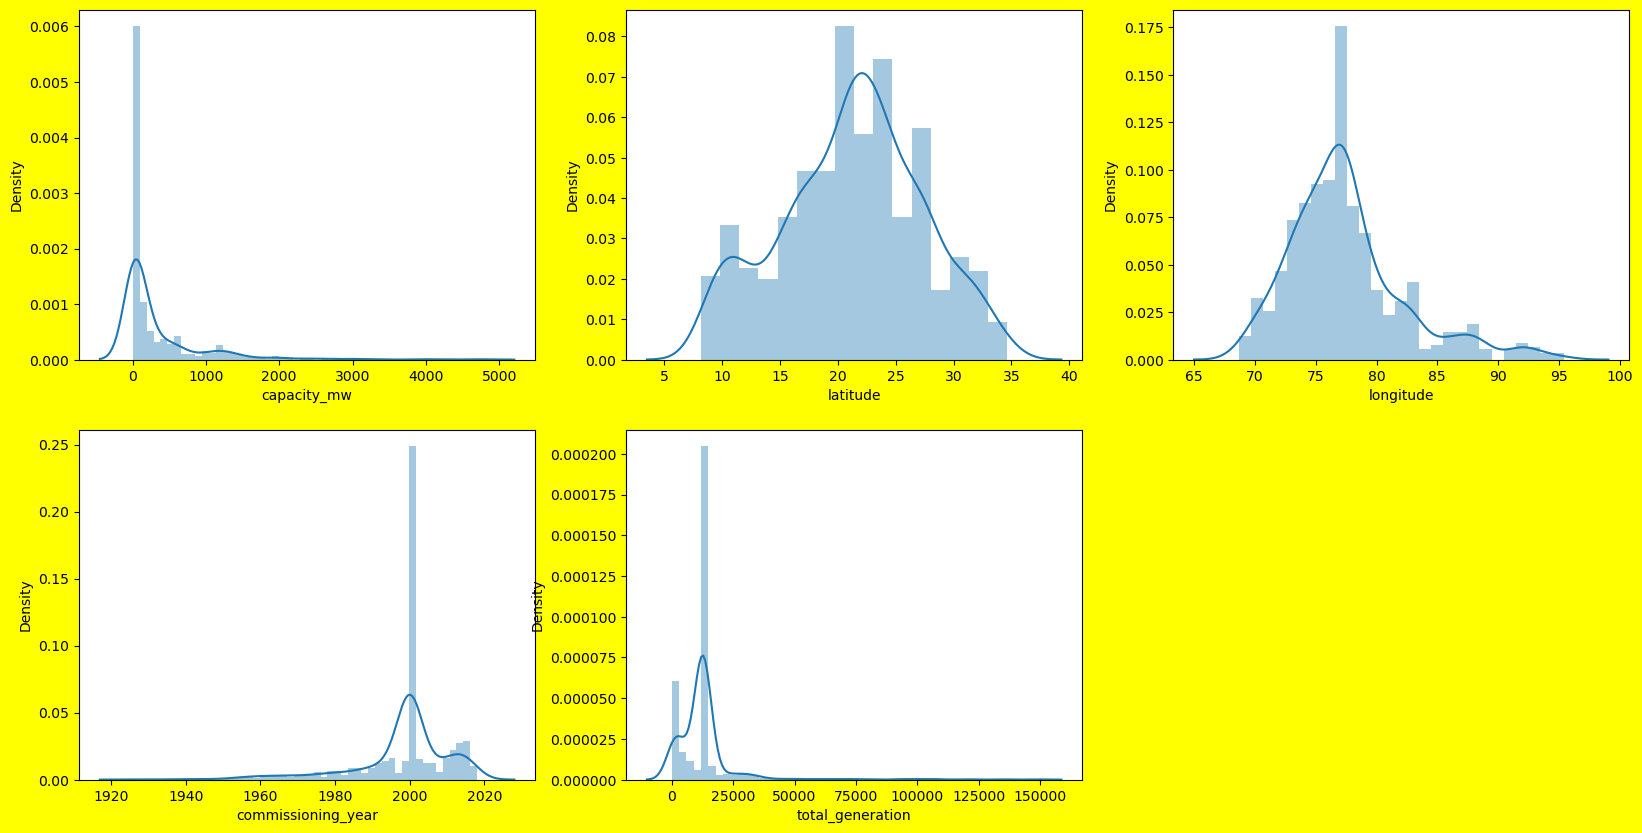

In [125]:
# Here we check how data is distributed, it is normally distributed or not.

# After go through the dataset we assume something that skewness and outliers is there so now we analyse the data to check 
# howmuch our assumption is correct.

plt.figure(figsize=(20,10),facecolor='yellow')
number=1
for i in numerical_object:
    if number<=5:
        ax=plt.subplot(2,3,number)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    number+=1
plt.show()                                                                                       

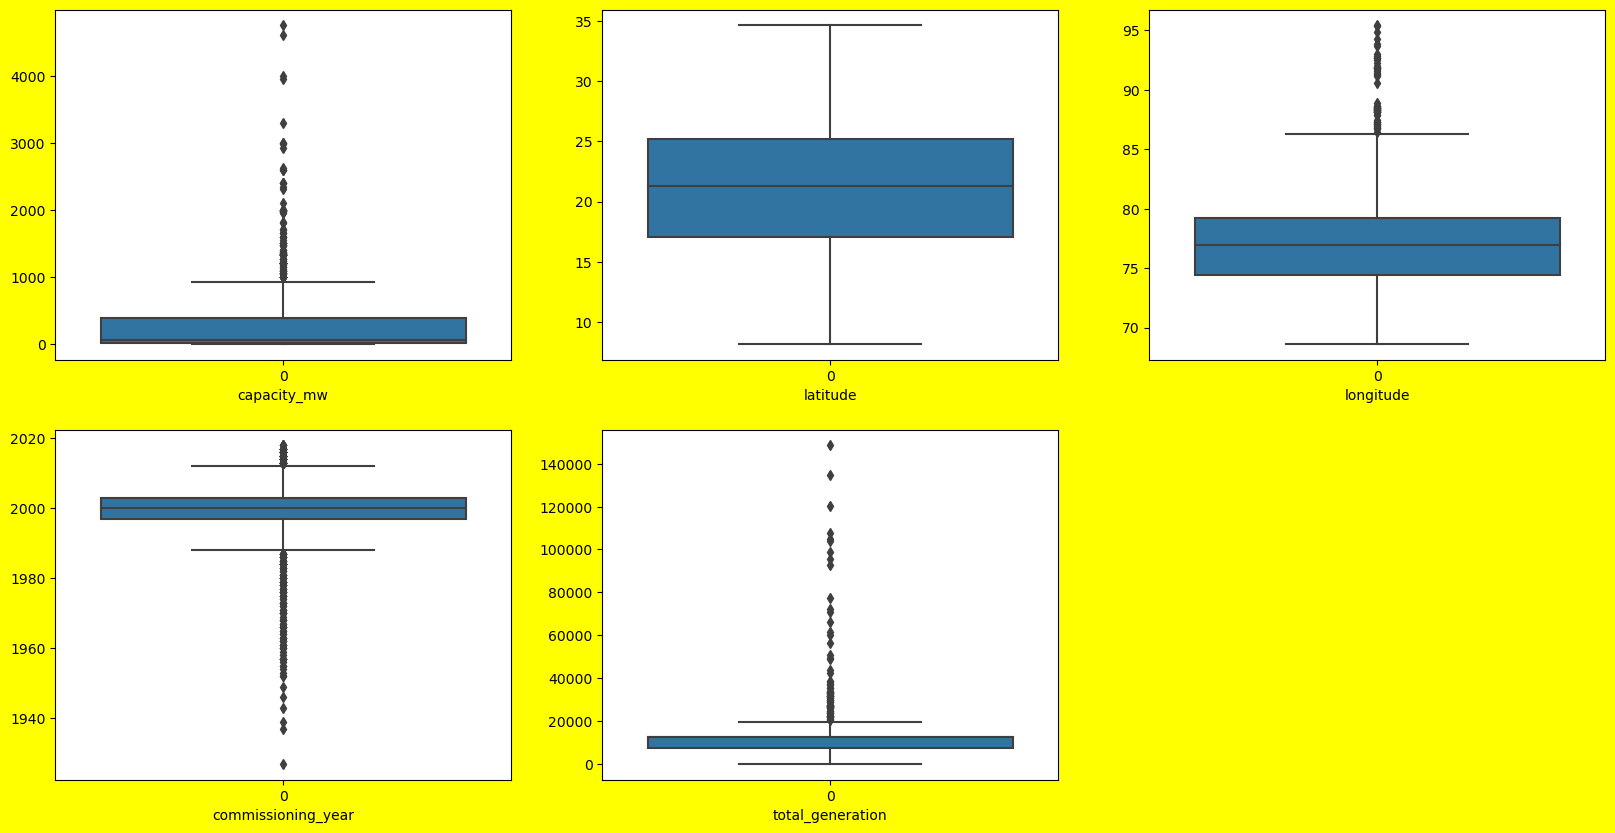

In [126]:
plt.figure(figsize=(20,10),facecolor='yellow')
number=1
for i in numerical_object:
    if number<=5:
        ax=plt.subplot(2,3,number)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=10)
    number+=1
plt.show()

In [127]:
# Find the standard number of outlier and remove it

from scipy.stats import zscore

z_score=zscore(df[['capacity_mw','longitude','commissioning_year','total_generation']])
data=np.abs(z_score)
filter_data=(data<3).all(axis=1)
df=df[filter_data]
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,total_generation
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,12569.845799
1,98.0,24.7663,74.6090,Coal,2000.0,Ultratech Cement ltd,Ultratech Cement ltd,12569.845799
2,39.2,21.9038,69.3732,Wind,2000.0,AES,CDM,12569.845799
3,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,3643.093120
4,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,22248.789736
...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,12569.845799
904,3.0,12.8932,78.1654,Solar,2000.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,12569.845799
905,25.5,15.2758,75.5811,Wind,2000.0,Acc Acc ltd,CDM,12569.845799
906,80.0,24.3500,73.7477,Coal,2000.0,Hindustan Zinc ltd,Hindustan Zinc ltd,12569.845799


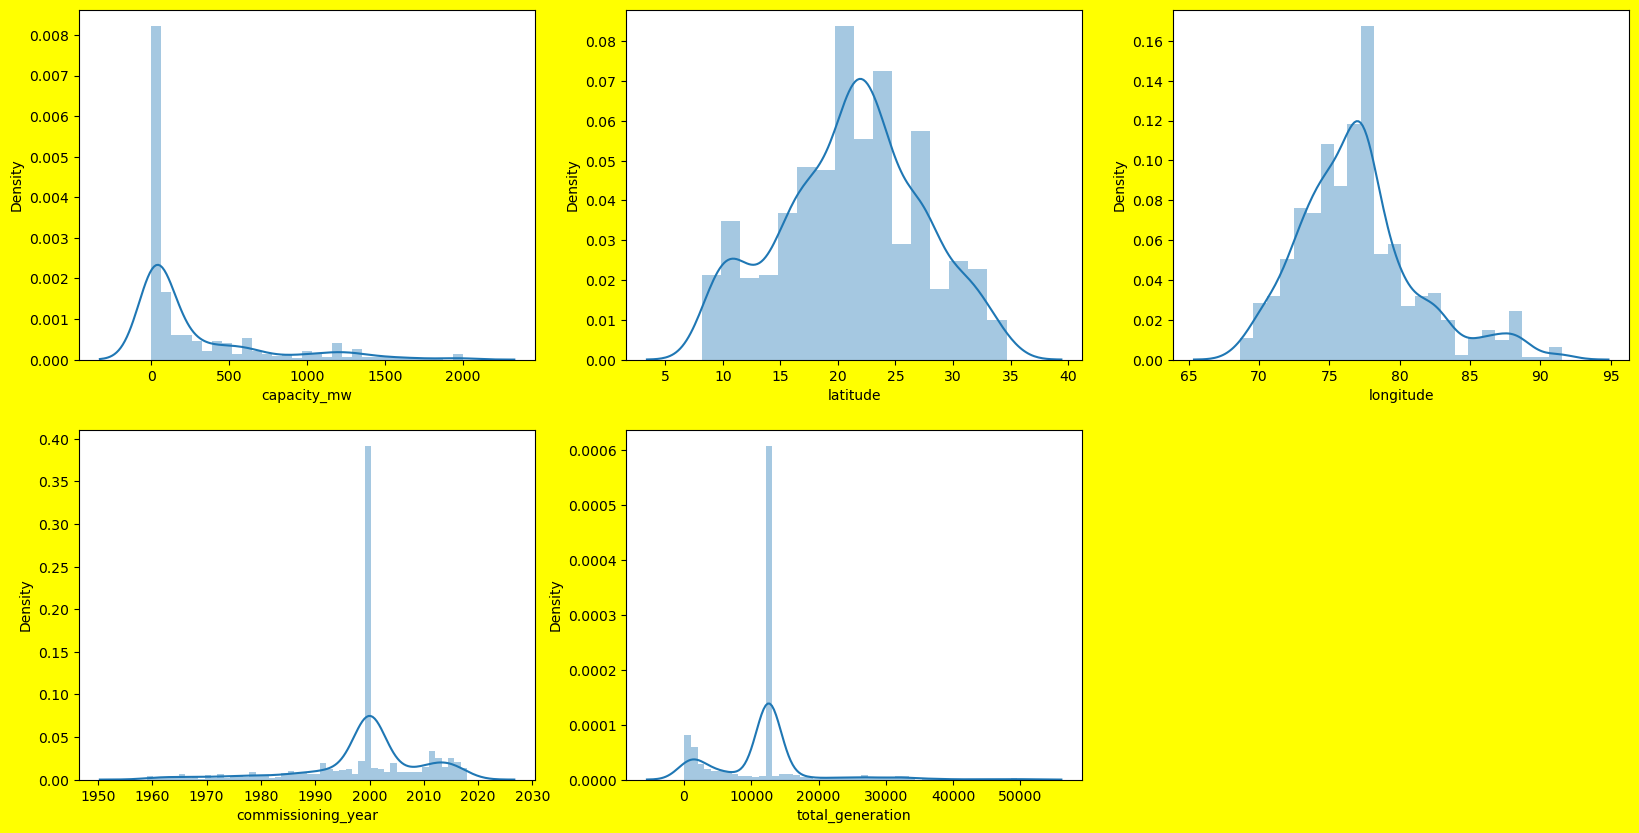

In [128]:
plt.figure(figsize=(20,10),facecolor='yellow')
number=1
for i in numerical_object:
    if number<=5:
        ax=plt.subplot(2,3,number)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    number+=1
plt.show()                                                                                       

In [129]:
for i in categorical_object:
    print(df[i].value_counts())

#cate_dataframe=pd.DataFrame(categorical_object)
#categorical_object.value_counts()

primary_fuel
Coal       239
Hydro      218
Solar      126
Wind       123
Gas         65
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int64
owner
Acc Acc ltd                                                    514
Sterling Agro Industries ltd.                                    4
Jk Cement ltd                                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
Karnataka Power Corporation Limited                              3
                                                              ... 
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Energy Infratech Private Limited                                 1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: count, Length: 279, dtype: int64
source
Central Electricity Authority                       

In [130]:
from category_encoders import BinaryEncoder

bi_enc=BinaryEncoder()

encod1=bi_enc.fit_transform(df[['owner','source','primary_fuel']])
encod1

,owner_0,owner_1,owner_2,owner_3,owner_4,owner_5,owner_6,owner_7,owner_8,source_0,...,source_2,source_3,source_4,source_5,source_6,source_7,primary_fuel_0,primary_fuel_1,primary_fuel_2,primary_fuel_3
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,1,0,0,1,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
904,0,0,1,1,0,1,0,1,1,0,...,0,0,1,1,1,1,0,0,0,1
905,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,1
906,0,0,0,1,1,0,1,1,0,0,...,1,0,1,0,1,0,0,0,1,0


In [131]:
df=pd.concat([df,encod1],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 0 to 907
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         851 non-null    float64
 1   latitude            851 non-null    float64
 2   longitude           851 non-null    float64
 3   primary_fuel        851 non-null    object 
 4   commissioning_year  851 non-null    float64
 5   owner               851 non-null    object 
 6   source              851 non-null    object 
 7   total_generation    851 non-null    float64
 8   owner_0             851 non-null    int64  
 9   owner_1             851 non-null    int64  
 10  owner_2             851 non-null    int64  
 11  owner_3             851 non-null    int64  
 12  owner_4             851 non-null    int64  
 13  owner_5             851 non-null    int64  
 14  owner_6             851 non-null    int64  
 15  owner_7             851 non-null    int64  
 16  owner_8      

In [132]:
df.drop(['owner','source','primary_fuel'],axis=1,inplace=True)

In [133]:
df

,capacity_mw,latitude,longitude,commissioning_year,total_generation,owner_0,owner_1,owner_2,owner_3,owner_4,...,source_2,source_3,source_4,source_5,source_6,source_7,primary_fuel_0,primary_fuel_1,primary_fuel_2,primary_fuel_3
0,2.5,28.1839,73.2407,2011.0,12569.845799,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,98.0,24.7663,74.6090,2000.0,12569.845799,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,39.2,21.9038,69.3732,2000.0,12569.845799,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
3,135.0,23.8712,91.3602,2004.0,3643.093120,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1800.0,21.9603,82.4091,2015.0,22248.789736,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016.0,12569.845799,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
904,3.0,12.8932,78.1654,2000.0,12569.845799,0,0,1,1,0,...,0,0,1,1,1,1,0,0,0,1
905,25.5,15.2758,75.5811,2000.0,12569.845799,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
906,80.0,24.3500,73.7477,2000.0,12569.845799,0,0,0,1,1,...,1,0,1,0,1,0,0,0,1,0


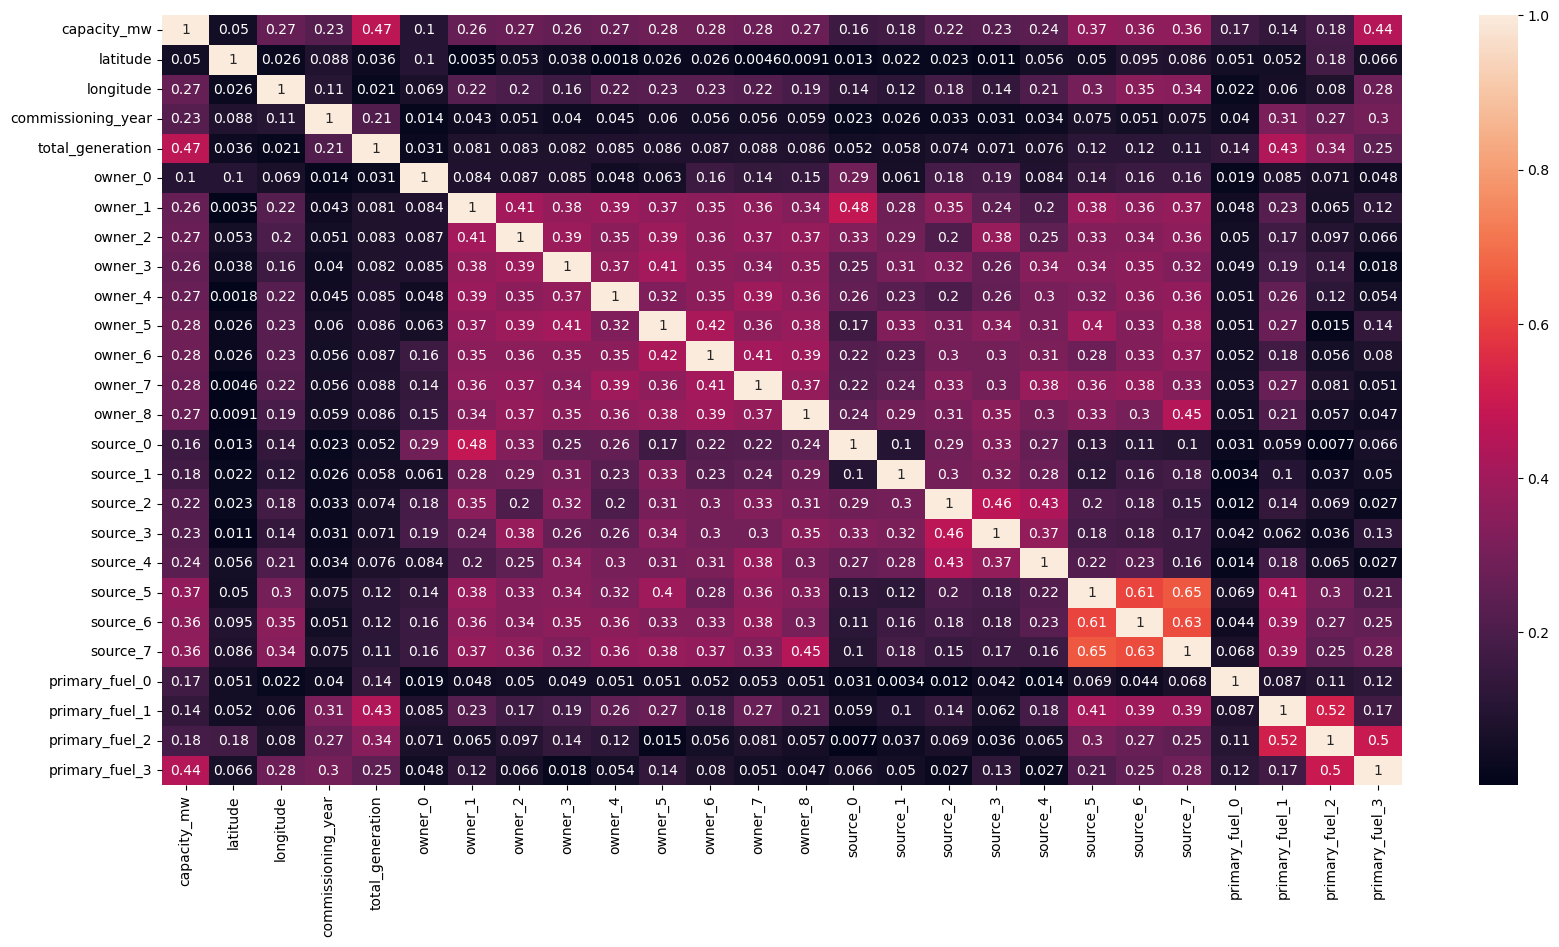

In [134]:
# Check the corelation and relationship b/w data (feature and Target)

plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True)
plt.show()

# After go through the heapmap we can see there is no corelation 

In [135]:
x=df.drop(['capacity_mw'],axis=1)
y=df.capacity_mw

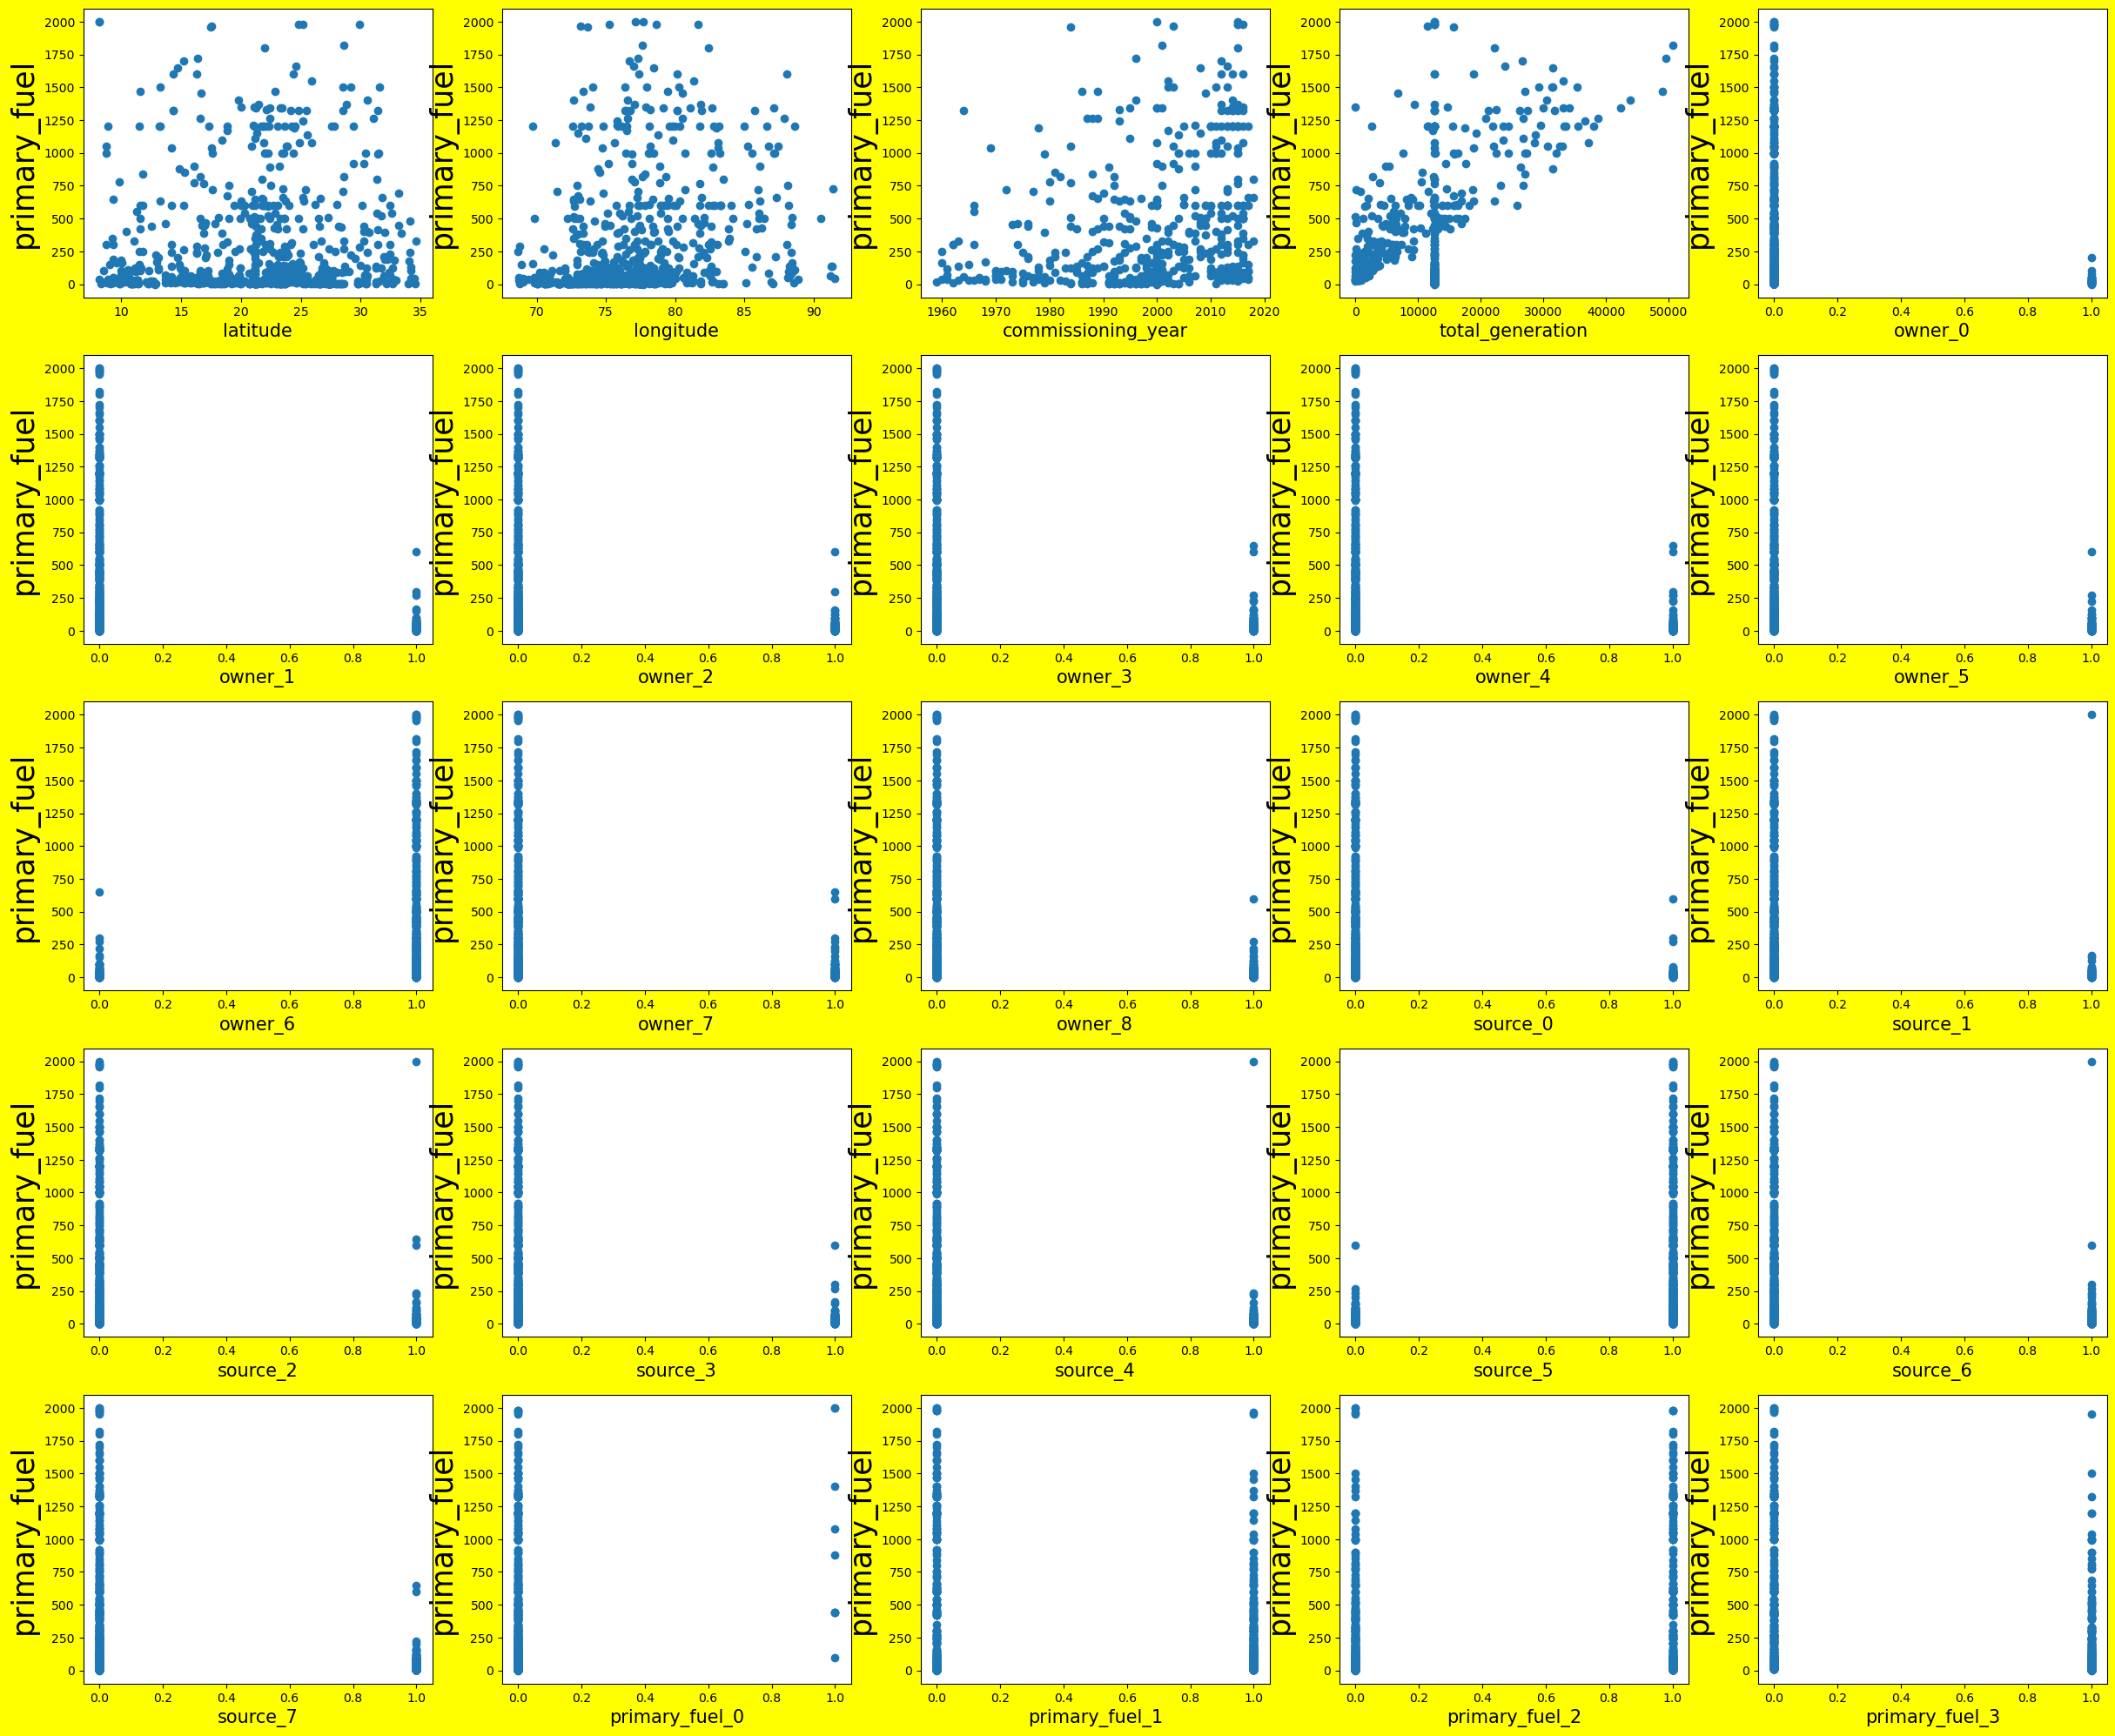

In [136]:
# Now we check the relation b/w Input and Output Variable

plt.figure(figsize=(30,25),facecolor='yellow')
number=1
for i in x:
    if number<=26:
        ax=plt.subplot(5,5,number)
        plt.scatter(x[i],y)
        plt.xlabel(i,fontsize=15)
        plt.ylabel('primary_fuel',fontsize=25)
    number+=1
plt.show()

# After go through the graph we analyse every feature has a relation with target so we can not remove any feature data on the 
# basis of assumption untill we are not sure.

In [137]:
# Now standarised the data means take all data on one scale.

from sklearn.preprocessing import StandardScaler

x_scaler=StandardScaler()
x_scaler=x_scaler.fit_transform(x)
x_scaler

array([[ 1.15619276, -0.89349369,  1.06569733, ..., -0.84396306,
        -1.01778444,  0.86246882],
       [ 0.59760266, -0.56826977,  0.07640809, ..., -0.84396306,
         0.98252632, -1.15946221],
       [ 0.12974096, -1.81273914,  0.07640809, ..., -0.84396306,
         0.98252632,  0.86246882],
       ...,
       [-0.9535734 , -0.3372165 ,  0.07640809, ..., -0.84396306,
         0.98252632,  0.86246882],
       [ 0.52956045, -0.77298757,  0.07640809, ..., -0.84396306,
         0.98252632, -1.15946221],
       [-1.82659925,  0.11336232,  0.07640809, ..., -0.84396306,
         0.98252632,  0.86246882]])

In [ ]:
# Here we use PCA Technique which convert feature into dimentions and select required dimentions and remaining will be removed.

In [138]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_scaler)

array([[ 0.83802187, -0.08237103, -1.55435178, ..., -0.79205822,
         1.00305326,  0.1031414 ],
       [ 0.81447785,  1.61036832, -0.86375286, ..., -1.02519943,
         1.11122556, -0.03451714],
       [ 2.344958  ,  0.62377356, -2.69367744, ..., -0.52124166,
         0.62603057, -0.87120938],
       ...,
       [ 0.21287198,  1.33665228, -2.8434201 , ...,  0.11277357,
         0.54381869, -0.51281325],
       [ 2.63815075,  1.05395549,  0.7194952 , ..., -0.36566465,
         0.06743913,  0.12684616],
       [ 2.45865966,  1.31416875, -2.58622315, ..., -0.48339416,
        -0.87358838,  0.65843017]])

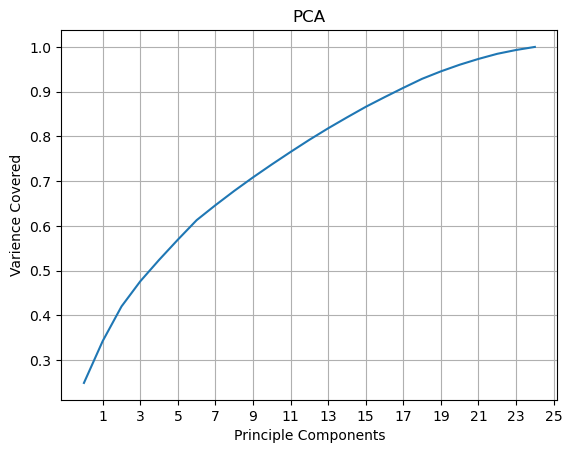

In [139]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,26,2))
plt.xlabel('Principle Components')
plt.ylabel('Varience Covered')
plt.title('PCA')
plt.show()

In [140]:
pca=PCA(n_components=21) # here we select required dimensions number
new_comp=pca.fit_transform(x_scaler)
princi_comp=pd.DataFrame(new_comp)
princi_comp

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.838022,-0.082371,-1.554352,-0.106293,1.447799,-1.262496,-0.700358,-1.853649,-0.162548,-0.441104,...,-0.332242,-0.005384,1.393606,1.192022,1.255933,0.085149,0.997992,-0.317564,0.127884,-0.959123
1,0.814478,1.610368,-0.863753,0.237824,0.570914,-0.200402,-0.415074,0.651360,-1.278484,-0.270306,...,-0.655685,0.007579,-0.940088,-1.249196,2.367318,-0.096557,0.090461,0.007174,0.600458,-0.075660
2,2.344958,0.623774,-2.693677,0.502718,0.950784,0.057216,-0.598830,-0.375161,-0.939225,-0.891176,...,-0.346309,0.356111,0.133495,0.839733,2.594070,0.394525,0.174675,0.120304,0.471399,0.292996
3,-2.897720,-0.035751,1.380795,-0.300252,-1.052807,-0.362946,-0.948080,-1.195553,-0.556301,1.449388,...,0.911497,-0.528264,-0.289861,-0.077100,0.014214,-0.690550,0.364665,-0.049433,0.505504,-0.327110
4,-1.717351,2.826615,0.975924,-0.233420,0.141391,-0.579699,-0.190222,-0.341802,0.059276,0.015768,...,-0.497010,0.059436,-0.195269,0.368847,-0.345245,-0.205507,-0.014624,0.081541,0.034812,0.073954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,-1.620526,2.201595,0.528523,0.049545,-0.316492,0.072326,-0.229388,-0.024084,-0.016771,0.301723,...,-0.368147,0.354597,0.023903,0.071046,-0.190452,0.502845,-0.050998,-0.096733,-0.315623,0.300563
847,4.334934,-1.112295,0.117267,-2.118274,0.253713,2.156584,-1.291319,-1.349669,-1.480163,0.230831,...,-1.155373,-1.164593,-0.423655,1.373671,-0.052047,-0.730073,-1.727206,-1.899487,-0.519720,1.180856
848,0.212872,1.336652,-2.843420,0.444336,0.070002,0.547817,-0.118980,0.641335,0.838417,0.447806,...,0.198061,-0.138463,-0.180151,0.312968,-0.120997,-0.303360,0.461787,-0.167038,0.205905,0.063460
849,2.638151,1.053955,0.719495,-0.127852,0.878892,-0.034061,-0.191646,3.812086,-1.935616,1.148277,...,0.772219,-0.003968,0.347992,-0.113935,0.084634,-0.277655,-0.362512,1.380508,-0.574960,-0.587996


In [141]:
# Split the dataset into Training and Test Data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=.25,random_state=350)

In [142]:
# As it is Regression Problem so we use Regression Models
# Linear Regression Model

from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [143]:
# Now we evaluate the model using metrics that how model is performing.

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [144]:
y_pred=lin_reg.predict(x_test)
y_pred

array([ 3.59452449e+01,  1.01620697e+02, -2.81975304e+01, -4.87255154e+01,
        9.33966015e+02, -1.36103224e+02,  6.66296256e+02,  9.99182207e+01,
        2.71239419e+01,  8.64390587e+02,  3.90174902e+02, -3.37641942e+01,
        8.17205300e+02, -2.72255455e+01,  6.85525528e+02,  7.25683288e+02,
        9.34899045e+01,  3.74330770e+02,  9.19002430e+01,  1.07196255e+02,
        3.76678471e+02,  6.31337145e+02,  3.73921952e+02,  2.04340011e+02,
        9.54921268e+01,  1.07237538e+02,  2.80129892e+01,  2.23771630e+01,
        8.10760271e+02,  3.29545752e+02,  1.22481618e+03,  1.11877858e+02,
        3.70215211e+02, -8.18415999e+01, -2.84293373e+01,  1.92927211e+02,
        3.53819719e+02, -7.93494695e+01,  1.22258359e+03,  6.85203904e+02,
        1.15479338e+02,  9.84978759e+01,  3.69022675e+02,  1.08391799e+02,
       -1.14506326e+02,  3.73196362e+02,  1.09135784e+03,  1.11164607e+02,
        7.36286867e+02,  2.82681013e+02,  1.16101427e+02,  1.12998244e+03,
        3.14626306e+02,  

In [145]:
r1=r2_score(y_test,y_pred)
r1

0.6211906479041718

In [146]:
mae1=mean_absolute_error(y_test,y_pred)
mae1

186.82678552655543

In [147]:
mse1=mean_squared_error(y_test,y_pred)
mse1

71515.70353375799

In [148]:
rmse1=np.sqrt(mean_squared_error(y_test,y_pred))
rmse1

267.4242014735353

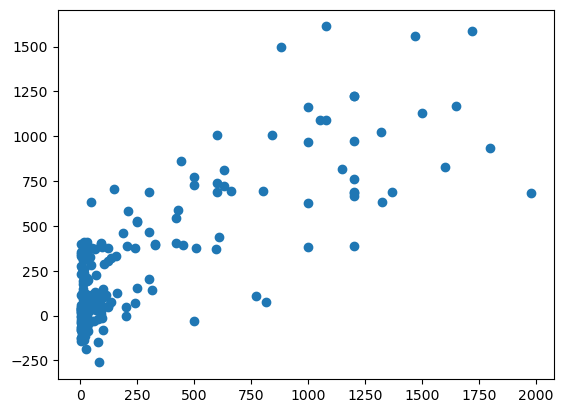

In [149]:
# RMSE is high so we use other model to recheck may be other other perform well.

plt.scatter(x=y_test,y=y_pred)

In [150]:
# Decision Tree Regressor Model

from sklearn.tree import DecisionTreeRegressor

dectree=DecisionTreeRegressor()
dectree.fit(x_train,y_train)

DecisionTreeRegressor()

In [151]:
pred1=dectree.predict(x_test)
pred1

array([5.0000e+00, 1.0000e+00, 1.6500e+01, 1.0000e+02, 1.3300e+03,
       5.0000e+00, 1.0800e+03, 1.0000e+00, 1.0000e+02, 2.9000e+02,
       2.4000e+01, 1.5000e+00, 7.5000e+02, 5.0000e+00, 5.4000e+02,
       6.0000e+02, 3.4650e+01, 6.8800e+01, 1.2000e+02, 6.7500e+01,
       1.0100e+02, 1.5000e+03, 6.0000e+00, 2.7000e+02, 5.0400e+01,
       1.2960e+01, 5.0000e+00, 1.8000e+00, 1.1000e+03, 5.1500e+02,
       1.2000e+03, 1.4650e+01, 9.0000e+00, 3.4400e+01, 6.0000e+01,
       2.6000e+01, 9.0000e+00, 1.0000e+00, 1.2000e+03, 3.5000e+02,
       5.0400e+01, 1.2600e+02, 6.0000e+01, 3.5100e+01, 2.5000e+01,
       6.0000e+01, 1.5000e+03, 3.9200e+01, 1.2000e+03, 3.6000e+01,
       7.5000e+01, 1.5500e+03, 1.0600e+02, 3.0000e+01, 1.0500e+03,
       3.6000e+00, 3.0000e+02, 1.1000e+01, 7.5000e+01, 1.3200e+03,
       3.9200e+01, 5.6250e+01, 2.0000e+00, 2.2500e+01, 3.1000e+01,
       2.4000e+02, 3.2000e+01, 1.2600e+03, 4.6000e+01, 3.5000e+02,
       1.5000e+02, 1.3500e+02, 1.4400e+01, 1.2100e+03, 1.6500e

In [152]:
r2=r2_score(y_test,pred1)
r2

0.6360243449998495

In [153]:
mae2=mean_absolute_error(y_test,pred1)
mae2

134.38805164319248

In [154]:
mse2=mean_squared_error(y_test,pred1)
mse2

68715.23866156103

In [155]:
rmse2=np.sqrt(mean_squared_error(y_test,pred1))
rmse2

262.1359163898778

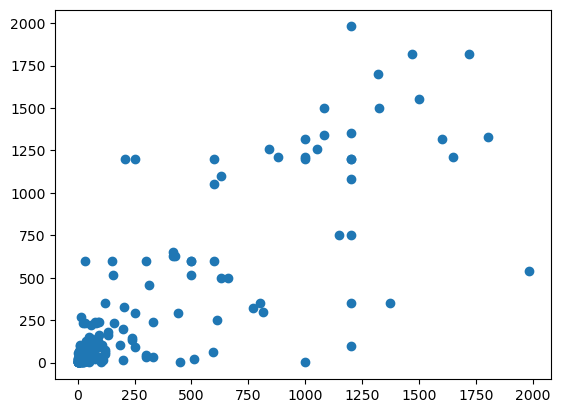

In [156]:
# RMSE score is batter than Linear Regresion but we use other model to recheck may be other other perform well.

plt.scatter(x=y_test,y=pred1)

In [157]:
# AdaBoost Regressor Model

from sklearn.ensemble import AdaBoostRegressor

In [158]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [159]:
pred2=ada.predict(x_test)
pred2

array([ 184.31027219,  141.13870968,  152.2355122 ,  152.2355122 ,
       1012.33333333,  152.2355122 ,  794.70087772,  141.13870968,
        141.13870968,  307.33418367,  549.60119048,  152.2355122 ,
       1252.73809524,  141.13870968,  877.51909659,  897.02043284,
        152.2355122 ,  391.57438978,  307.33418367,  152.2355122 ,
        507.7990708 , 1091.5625    ,  184.31027219,  270.87145078,
        336.53490566,  270.87145078,  141.13870968,  152.2355122 ,
       1061.79367391,  467.84797959, 1334.        ,  152.2355122 ,
        391.57438978,  152.2355122 ,  267.95      ,  301.19362745,
        184.31027219,  152.2355122 , 1076.10287565,  724.3184645 ,
        152.2355122 ,  396.41025641,  430.60817895,  152.2355122 ,
        152.2355122 ,  691.98190698, 1334.        ,  152.2355122 ,
        777.66643312,  270.87145078,  301.19362745, 1267.42834197,
        270.87145078,  410.17881667, 1021.4768125 ,  152.2355122 ,
        307.33418367,  184.31027219,  270.87145078, 1012.33333

In [164]:
r3=r2_score(y_test,pred2)
r3

0.5828358341766806

In [165]:
mae3=mean_absolute_error(y_test,pred2)
mae3

228.9028612877301

In [166]:
mse3=mean_squared_error(y_test,pred2)
mse3

78756.73777024611

In [167]:
rmse3=np.sqrt(mean_squared_error(y_test,pred2))
rmse3

280.63630871689804

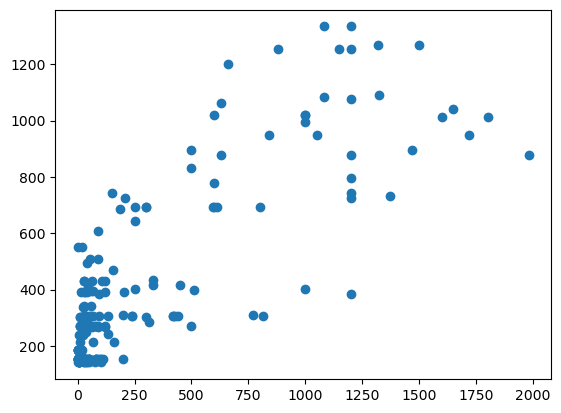

In [168]:
# RMSE score is high so we use other model to recheck may be other other perform well.

plt.scatter(x=y_test,y=pred2)

In [169]:
# Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
ran_forst=RandomForestRegressor()
ran_forst.fit(x_train,y_train)

RandomForestRegressor()

In [170]:
pred3=ran_forst.predict(x_test)
pred3

array([  61.66      ,   19.214     ,   26.9849    ,   40.435     ,
       1164.366     ,   21.585     ,  740.2166    ,   25.86      ,
         61.079     ,  426.07172   ,   55.945     ,   18.79689762,
        849.238     ,    6.183     ,  990.452     ,  630.8578    ,
         54.5225    ,   28.3529    ,   80.523     ,   32.48433333,
        237.5711    , 1387.1       ,   11.896     ,  173.9332    ,
         27.0875    ,   20.01      ,    8.796     ,   10.191     ,
        852.23      ,  419.89579   , 1332.6       ,   44.73033333,
        108.79533333,   26.12853333,   70.71      ,   23.8364    ,
         13.17      ,   50.846     , 1388.7       ,  601.205     ,
         31.931     ,  128.216     ,  179.9193    ,   50.567     ,
         48.8525    ,  323.9895    , 1324.9       ,   28.1935    ,
        900.055     ,   72.83966667,   47.24333333, 1401.3       ,
         83.5915    ,   53.15366667, 1016.38      ,   14.66466667,
        232.519     ,   10.43933333,   72.632     ,  973.536  

In [171]:
r4=r2_score(y_test,pred3)
r4

0.7649565265162919

In [172]:
mae4=mean_absolute_error(y_test,pred3)
mae4

114.07539561588386

In [173]:
mse4=mean_squared_error(y_test,pred3)
mse4

44374.03478611399

In [174]:
rmse4=np.sqrt(mean_squared_error(y_test,pred3))
rmse4

210.65145332067848

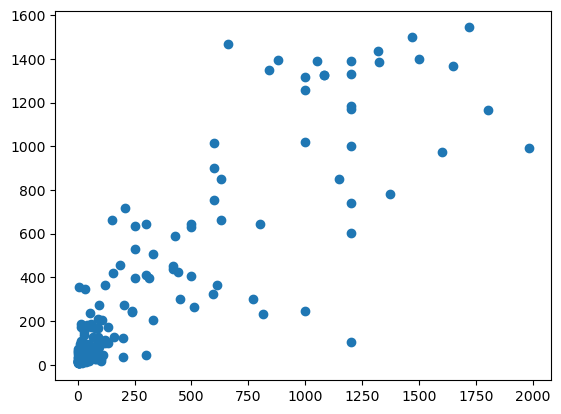

In [175]:
# RMSE score is batter than all above models but we use other model to recheck may be other other perform well.

plt.scatter(x=y_test,y=pred3)

In [176]:
# KNN Regressor Model

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [177]:
pred4=knn.predict(x_test)
pred4

array([  72.52  ,   28.46  ,   22.02  ,   17.42  ,  994.    ,   19.    ,
       1006.    ,   42.2   ,   67.    ,  876.    ,    9.95  ,   13.92  ,
        726.916 ,    5.2   ,  877.    ,  864.    ,   12.96  ,   68.16  ,
        286.    ,   39.1   ,  138.336 ,  342.5   ,   11.92  ,   19.2   ,
         50.6   ,   31.312 ,   28.2   ,   13.    ,  756.    ,  511.4862,
       1336.    ,   43.07  ,   10.78  ,   19.97  ,   71.27  ,   37.9   ,
         10.8   ,    6.8   , 1390.    ,  614.    ,   47.14  ,  184.2   ,
        224.    ,   39.48  ,   27.2   ,  656.7722, 1418.    ,   63.48  ,
       1264.    ,   81.84  ,   34.4   , 1320.    ,   75.28  ,  822.416 ,
       1000.    ,   12.36  ,  205.4   ,    8.32  ,   70.5   , 1014.    ,
        103.68  ,   26.86  ,   33.    ,   25.68  ,   86.2   ,  529.604 ,
        168.    , 1184.    ,   32.22  ,  548.    ,   63.06  ,  286.    ,
         41.44  , 1278.    ,   32.38  ,   80.16  ,   19.4   ,  165.9   ,
         26.24  ,   77.34  ,  138.8   ,   19.97  , 

In [178]:
r5=r2_score(y_test,pred4)
r5

0.6559492297519385

In [179]:
mae5=mean_absolute_error(y_test,pred4)
mae5

141.78042441314554

In [180]:
mse5=mean_squared_error(y_test,pred4)
mse5

64953.604628528454

In [181]:
rmse5=np.sqrt(mean_squared_error(y_test,pred4))
rmse5

254.85997062804597

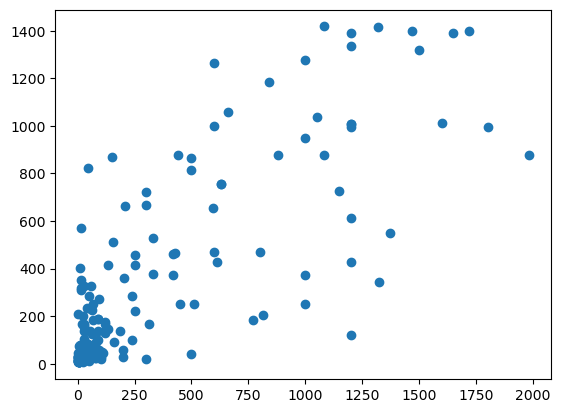

In [182]:
# RMSE score is high so we use other model to recheck may be other other perform well.

plt.scatter(x=y_test,y=pred4)

In [183]:
# Gradient Boosting Regressor Model

from sklearn.ensemble import GradientBoostingRegressor
gbdt=GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

GradientBoostingRegressor()

In [184]:
pred5=gbdt.predict(x_test)
pred5

array([  43.47915542,   22.40829236,   25.37951428,   25.11611643,
       1286.59494042,   13.20129422, 1023.64766118,   34.19308273,
         11.07092024,  414.12632634,  101.62759173,   17.6786205 ,
        912.31135089,   17.88695332, 1124.05595987,  529.66089799,
         54.0532744 ,   84.52389725,   87.96222498,   27.62455364,
        285.80734317, 1345.78862466,   52.22616054,   84.28657837,
         84.34447821,   35.26150178,   10.50519036,   17.35541983,
        966.86624848,  432.62738561, 1445.65876355,   37.80494603,
        122.89853295,   15.26746649,   73.79263395,   37.35830617,
         42.16134315,   44.95557028, 1287.29397417,  715.8046765 ,
         34.56437607,   22.0678142 ,  155.51898115,   30.15620041,
         18.81882829,  403.6746733 , 1322.34691604,   32.25335352,
        600.27770402,   83.89023935,   79.25050519, 1374.48048304,
         95.45389462,  130.75885935, 1060.45296008,   20.97133863,
        208.94048738,   31.90018086,   49.6226458 ,  879.33138

In [185]:
r6=r2_score(y_test,pred5)
r6

0.7887017460611452

In [186]:
mae6=mean_absolute_error(y_test,pred5)
mae6

114.02337583633

In [187]:
mse6=mean_squared_error(y_test,pred5)
mse6

39891.156863701595

In [188]:
rmse6=np.sqrt(mean_squared_error(y_test,pred5))
rmse6

199.72770680028745

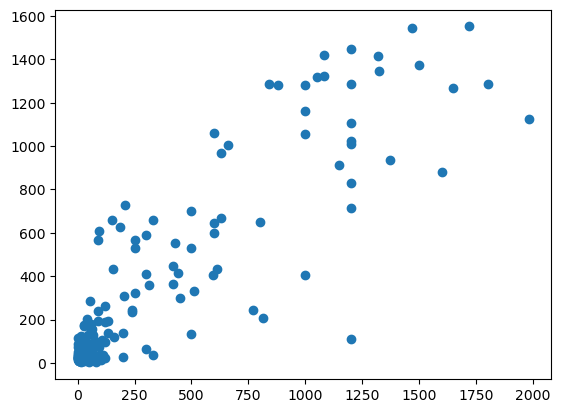

In [189]:
# RMSE score is batter than all above models but we use other model to recheck may be other other perform well.

plt.scatter(x=y_test,y=pred5)

In [190]:
models = pd.DataFrame({'Model': ['Linear_Regression','Decision Tree','AdaBoost','Random_Forest','KNN_Model','GBDT'],
                       'R2 Score Result':[r1,r2,r3,r4,r5,r6],'MAE Result':[mae1,mae2,mae3,mae4,mae5,mae6],
                       'MSE Result':[mse1,mse2,mse3,mse4,mse5,mse6],'RMSE Result':[rmse1,rmse2,rmse3,rmse4,rmse5,
                                                                                        rmse6]})
                       
models

,Model,R2 Score Result,MAE Result,MSE Result,RMSE Result
0,Linear_Regression,0.621191,186.826786,71515.703534,267.424201
1,Decision Tree,0.636024,134.388052,68715.238662,262.135916
2,AdaBoost,0.582836,228.902861,78756.737770,280.636309
3,Random_Forest,0.764957,114.075396,44374.034786,210.651453
4,KNN_Model,0.655949,141.780424,64953.604629,254.859971
5,GBDT,0.788702,114.023376,39891.156864,199.727707


In [ ]:
# In above DataFrame we can see Gradient Boost Decision Tree Model is Performing better than other models

In [ ]:
# Hyperparameter Tunnning for Random forest Model

In [191]:
params={'max_depth': range(4,8),'min_samples_split': range(2,8,2),'n_estimators':range(20,100,10),
            'learning_rate':np.arange(0.1,0.3)}

In [192]:
from sklearn.model_selection import GridSearchCV

In [193]:
grid_search= GridSearchCV(gbdt,param_grid=params,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2),
                         'n_estimators': range(20, 100, 10)})

In [194]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 80}

In [195]:
grid_search.best_estimator_

GradientBoostingRegressor(max_depth=4, n_estimators=80)

In [196]:
# Final Model

final_model=GradientBoostingRegressor(learning_rate=0.1,max_depth=4, min_samples_split=2, n_estimators=80)
final_model.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=80)

In [197]:
predd=final_model.predict(x_test)
predd

array([  52.61893454,   22.8187661 ,   26.00835045,   29.94641931,
       1244.11004627,   27.20688665, 1167.89090653,   28.12935366,
         17.03397425,  464.70089834,   75.66009105,   22.21288985,
        881.47506445,   16.63271237, 1151.59996295,  623.58744249,
         74.61848902,   62.72353496,   74.18034455,   29.2022243 ,
        304.3371426 , 1389.23547196,   31.49399938,   78.50909121,
         65.01072982,   32.53971049,   17.35602639,   12.15005821,
        964.31609797,  516.52872384, 1377.95141578,   34.95660264,
         68.25710536,   20.27085121,   72.18985573,   35.05347929,
         29.62380079,   41.38591977, 1256.28168445,  650.44550751,
         32.88873236,   79.45225065,   83.63735699,   35.40720381,
         29.62241196,  407.53059272, 1295.48817602,   34.61373714,
        644.0043945 ,   65.34768185,   63.67700168, 1338.88481349,
         95.67591937,  246.61262949,  933.14086988,   30.60236851,
        240.63396723,   22.70931281,   88.98522469, 1038.49371

In [198]:
r2_score(y_test,predd)

0.7931108430605216

In [199]:
mean_absolute_error(y_test,predd)

108.39413475016329

In [200]:
mean_squared_error(y_test,predd)

39058.76011289695

In [201]:
np.sqrt(mean_squared_error(y_test,predd))

197.6328922849052

In [ ]:
# END OF PROJECT 1 OF PHASE 2